## Movie Recommendation System by Shromana Majumder (04.04.24)

### What is a Recommendation System? 

A Recommendation System is a filtration program whose prime goal is to predict a user’s “rating” or “preference” towards a domain-specific item or item. In this case, this domain-specific item is a movie.


**Main Types of Recommendation Systems:**

* Content-based Filtering: 
Content-based filtering is a recommendation strategy that suggests items similar to those a user has previously liked. It calculates similarity (often using cosine similarity) between the user’s preferences and item attributes, such as lead actors, directors, and genres.
* Collaborative Filtering: 
Collaborative filtering is a recommendation strategy that considers the user’s behavior and compares it with other users in the database. It uses the history of all users to influence the recommendation algorithm.
* Item-based Collaborative Filtering: 
Item-based Collaborative Filtering focuses on finding similar movies instead of similar users to recommend to user ‘A’ based on their past preferences.

In this implementation, when the user searches for a movie it will recommend the top  similar movies using the movie recommendation system. I have used  a content based filtering algorithm for this purpose. 

## Data Wrangling

### Importing Libraries

In [158]:
!pip install cpi

In [1]:
import json
import ast 
import cpi
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

C:\Users\shromana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load the data

### Load the movies

In [2]:
movie_path = "tmdb_5000_movies.csv"

In [3]:
movie_df = pd.read_csv(movie_path)
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Check the shape
movie_df.shape

(4803, 20)

In [5]:
# Check for detailed info
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
movie_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

* release_date variable should be of the form datetime

In [7]:
#Statistical Description
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Check for unique values

In [9]:
movie_df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

1. While there are 4803 movies in total, there are only 4800 unique titles and which suggest the presence of duplicates
2. There are 4800 titles but 4801 original titles which suggests further investigation in the 2 variables
3. There are 4802 unique popularity values instead of 4803 which suggests presence of duplicates
4. Status has only 3 unique values which needs further investigation to find if we need all the observations or some of them can be removed

## Load the credits 

In [10]:
credits_path = "tmdb_5000_credits.csv"

In [11]:
credits_df = pd.read_csv(credits_path)
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
# Check the shape 
credits_df.shape

(4803, 4)

In [13]:
# Check for detailed info 
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [14]:
credits_df.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

### Merge Dataframes

In [15]:
movies = movie_df.merge(credits_df,on='title')

In [16]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


## Data Preprocessing

### Check for the duplicates

In [17]:
sum(movie_df.duplicated())

0

* No Duplicates

### Null values

In [18]:
movie_df.apply(lambda x: sum(x.isna()),axis=0)

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

* Homepage and tagline have large no of missing values

#### Runtime null values

In [19]:
movie_df.loc[movie_df.runtime.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0


* set them to the mean runtime

In [20]:
movie_df.runtime.fillna(movie_df.runtime.mean(),inplace=True)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10228\3047843463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df.runtime.fillna(movie_df.runtime.mean(),inplace=True)


### Release date null value

In [21]:
movie_df.loc[movie_df.release_date.isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


 * drop the null value

In [22]:
movie_df= movie_df.loc[movie_df.release_date.notnull()]

#### Overview null values

* fix the null values using Unspecified

In [23]:
movie_df.overview.fillna("Unsepecified",inplace=True)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10228\3772058113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df.overview.fillna("Unsepecified",inplace=True)


### Zero values

In [24]:
movie_df.apply(lambda x: sum(x==0),axis=0)

budget                  1036
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1426
runtime                   34
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              62
vote_count                61
dtype: int64

* Budget And Revenue have Zero values

#### Revenue and budget

In [25]:
movie_df.query('revenue == 0 or budget == 0').count()

budget                  1573
genres                  1573
homepage                 365
id                      1573
keywords                1573
original_language       1573
original_title          1573
overview                1573
popularity              1573
production_companies    1573
production_countries    1573
release_date            1573
revenue                 1573
runtime                 1573
spoken_languages        1573
status                  1573
tagline                  975
title                   1573
vote_average            1573
vote_count              1573
dtype: int64

* There are quite many observations where budget and revenue have zero values

Since primary objective is predicting revenue, I will drop the zero valued revenues and budgets

In [26]:
outlier_thresh=500
movie_df=movie_df[movie_df.budget>outlier_thresh]
movie_df=movie_df[movie_df.revenue>outlier_thresh]
len(movie_df)

3211

### Profit
* 𝑟𝑒𝑣𝑒𝑛𝑢𝑒−𝑏𝑢𝑑𝑔𝑒𝑡=𝑝𝑟𝑜𝑓𝑖𝑡

In [27]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.profit.head(2)

0    2550965087
1     661000000
Name: profit, dtype: int64

In [28]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

vote_average    2
vote_count      2
dtype: int64

* Vote count and average have zero values

In [29]:
movie_df=movie_df[movie_df.vote_count>0]

In [30]:
zero_vals=movie_df.apply(lambda x: sum(x==0),axis=0)
zero_vals[zero_vals>0]

Series([], dtype: int64)

No more zero values

### Count of each unique value in the status

In [31]:
movie_df.status.value_counts()

status
Released           3208
Post Production       1
Name: count, dtype: int64

* Almost all the obseravtions  belong to Released status.

### Check the instances where original title do not match with title column

In [32]:
movie_df[['original_title', 'title']].query('original_title != title')

,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
488,Arthur et les Minimoys,Arthur and the Invisibles
...,...,...
4482,L.I.E. Long Island Expressway,L.I.E.
4535,七人の侍,Seven Samurai
4672,Per un pugno di dollari,A Fistful of Dollars
4695,بچه‌های آسمان,Children of Heaven


### Filter  with status 'Released'

In [33]:
movie_df = movie_df[movie_df['status'] == "Released"]
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000


### JSON Handling

In [34]:
columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']

for col in columns: 
    movie_df[col] = movie_df[col].apply(json.loads)



### Convering to date time format

In [35]:
movie_df['release_date'] =  pd.to_datetime(movie_df['release_date'], format ='%Y-%m-%d')

In [36]:
movie_df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

A movie can have several genres.

In [37]:
movie_df['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [38]:
#Extract the names from the json data
for col in columns: 
    movie_df[col] = movie_df[col].map(lambda x:[i['name'] for i in x])

movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


### Extract year, month and day of year from release date

In [39]:
movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [40]:
movie_df['release_date'] = movie_df['release_date'].map(lambda dates: datetime.datetime.strptime(str(dates), '%Y-%m-%d %H:%M:%S'))
movie_df['day_of_year'] = movie_df['release_date'].map(lambda dates: dates.timetuple().tm_yday)

movie_df['year'] = movie_df['release_date'].map(lambda dates: dates.year)

In [41]:
movie_df['month'] = movie_df['release_date'].map(lambda dates: dates.month)

In [42]:
movie_df['date'] = movie_df['release_date'].map(lambda dates: dates.day)

In [43]:
movie_df['day'] = movie_df['release_date'].dt.day_name()

In [44]:
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,profit,year,day_of_year,month,date,day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,2007,139,5,19,Saturday


## Correlation

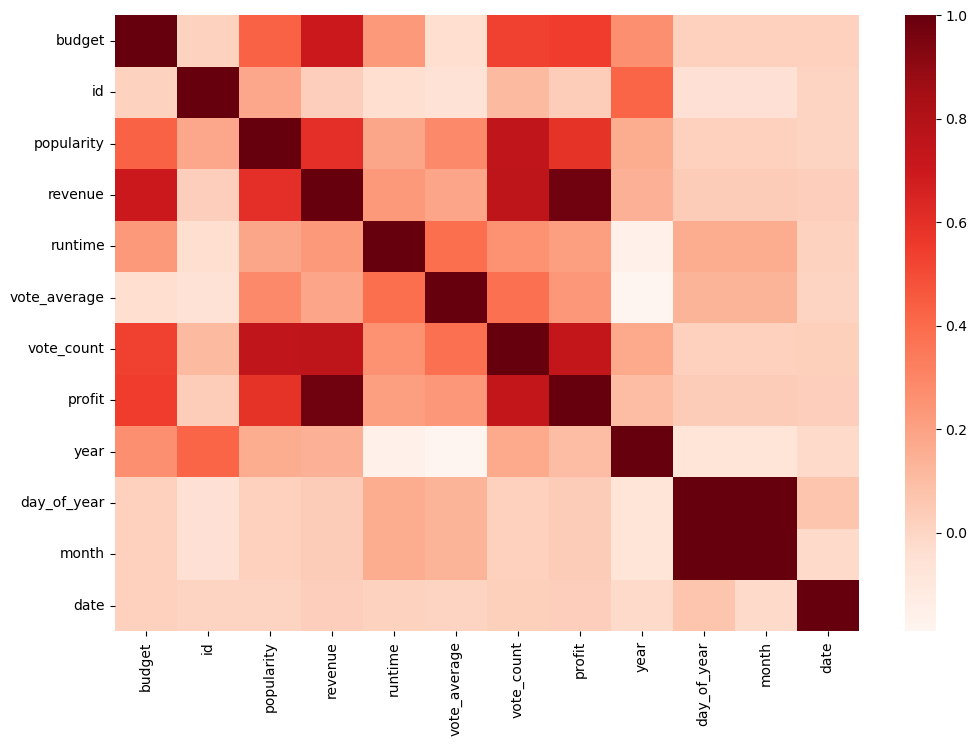

In [45]:
# Select only numeric columns
numeric_columns = movie_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_columns.corr()

# Plot heatmap

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds",
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            square=False)
plt.show()


* Revenue is positively correlated with vote count and budget
* Profit is positively correlated  with Revenue

## Checking Credits

In [46]:
credits_df['crew'][0][:700]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "M'

In [47]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [48]:
# Check for unique values
credits_df.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

* While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates

### Check for the duplicates

In [49]:
sum(credits_df.duplicated())

0

### Null values

In [50]:
credits_df.apply(lambda x: sum(x.isna()),axis=0)

movie_id    0
title       0
cast        0
crew        0
dtype: int64

* No Null Values

In [51]:
columns = ['cast', 'crew']

for col in columns: 
    credits_df[col] = credits_df[col].apply(json.loads)
    
credits_df['cast'] = credits_df['cast'].map(lambda x:[ [i['name'],i['gender']] for i in x])
credits_df['crew'] = credits_df['crew'].map(lambda x:[ [i['name'],i['job'],i['department'],i['gender']] for i in x])

In [52]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric..."
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam..."
2,206647,Spectre,"[[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...","[[Thomas Newman, Original Music Composer, Soun..."
3,49026,The Dark Knight Rises,"[[Christian Bale, 2], [Michael Caine, 2], [Gar...","[[Hans Zimmer, Original Music Composer, Sound,..."
4,49529,John Carter,"[[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...","[[Andrew Stanton, Screenplay, Writing, 2], [An..."


In [53]:
credits_df.cast[0][:5]

[['Sam Worthington', 2],
 ['Zoe Saldana', 1],
 ['Sigourney Weaver', 1],
 ['Stephen Lang', 2],
 ['Michelle Rodriguez', 1]]

In [54]:
credits_df.crew[0][:5]

[['Stephen E. Rivkin', 'Editor', 'Editing', 0],
 ['Rick Carter', 'Production Design', 'Art', 2],
 ['Christopher Boyes', 'Sound Designer', 'Sound', 0],
 ['Christopher Boyes', 'Supervising Sound Editor', 'Sound', 0],
 ['Mali Finn', 'Casting', 'Production', 1]]

According to TMDB, 0 corresponds to 'not set', 1 to 'Female' and 2 to 'Male'.

## Exploratory Data Analysis

### Movie title

In [55]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

title
The Host    2
Name: title, dtype: int64

* Some movies have the same title

In [56]:
double_title = count_title[count_title != 1].index.values

Making the title unique by appending the release year

In [57]:
movie_df.title = movie_df.apply(lambda row: row.title+'_'+str(row.release_date) if (row.title in double_title) else row.title,axis = 1)

In [58]:
count_title = movie_df.groupby('title').title.count()
count_title[count_title != 1]

Series([], Name: title, dtype: int64)

## Visualisation

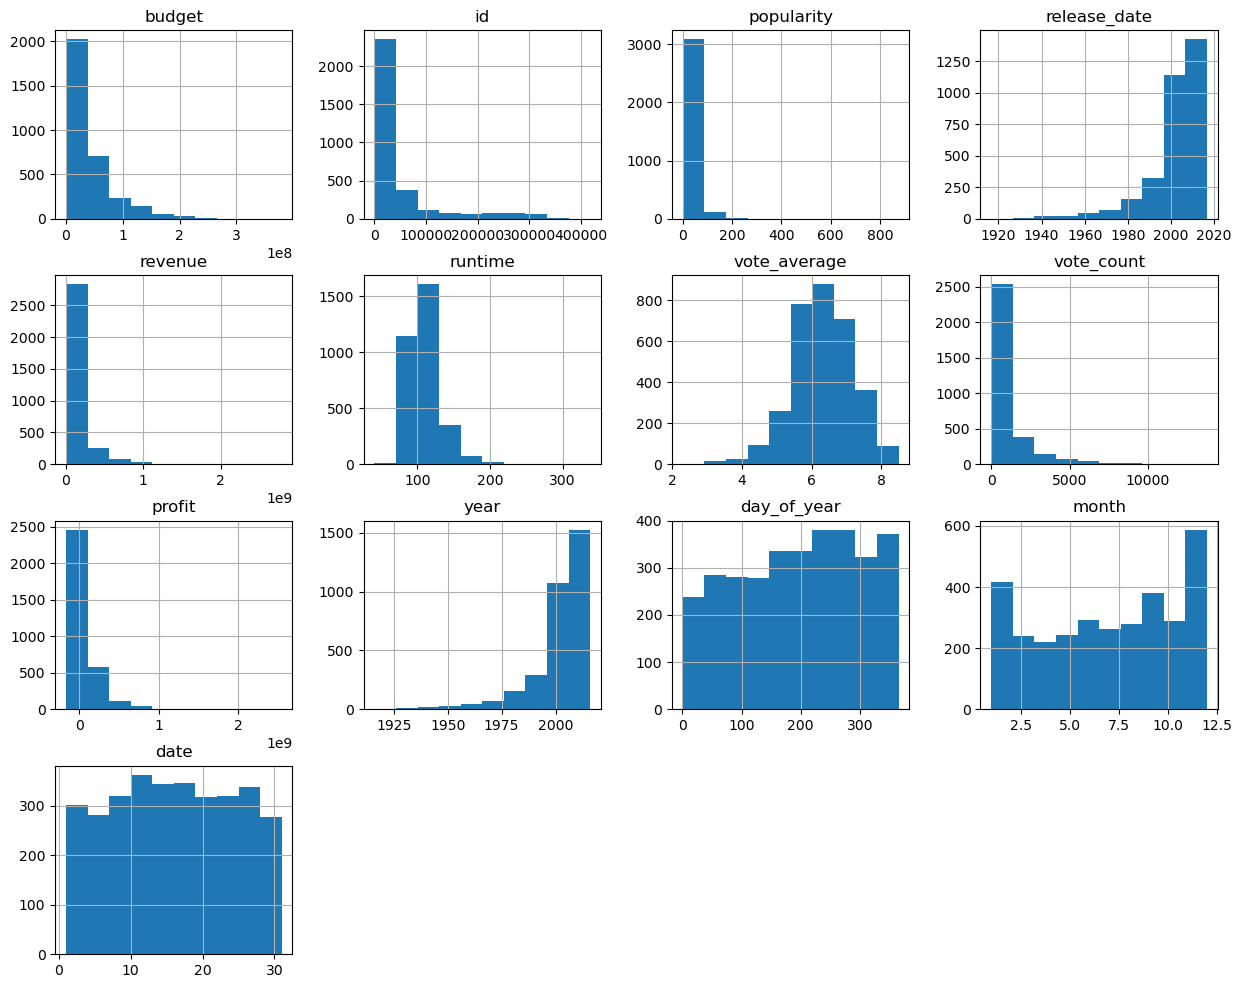

In [59]:
movie_df.hist(figsize = (15,12));

### Scatter plot

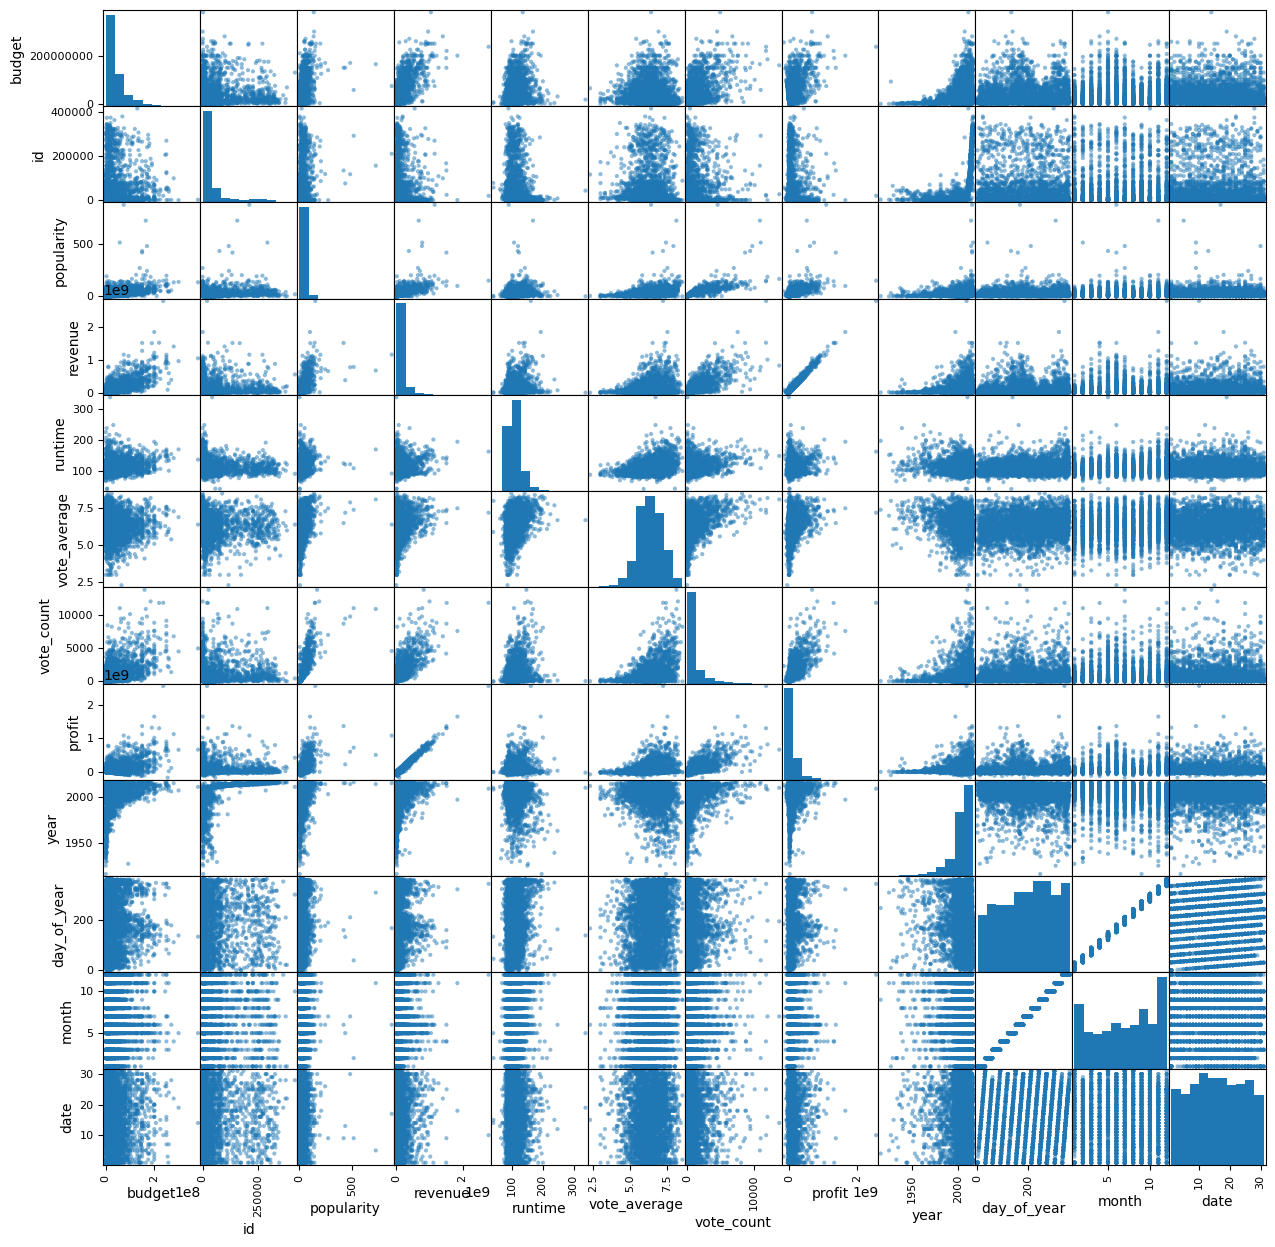

In [60]:
pd.plotting.scatter_matrix(movie_df, figsize = (15,15));

1. Profit vs Popularity shows positive but low correlation.
2. Profit vs Revenue shows the highest positive correlation
3. Profit vs Runtime show positive but very low correlation
4. Vote Average vs Runtime also show positive but low correlation
5. Popularity vs runtime also has very low but positive correlation

### Which weekdays as release days turn out to be most lucky for movies in terms of popularity and profit?

In [61]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,profit,year,day_of_year,month,date,day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,2007,139,5,19,Saturday
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,A Plan No One Escapes,Spectre,6.3,4466,635674609,2015,299,10,26,Monday
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099,2012,198,7,16,Monday
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,"Lost in our world, found in another.",John Carter,6.1,2124,24139100,2012,67,3,7,Wednesday


In [62]:
df1 = movie_df.groupby('day')[['day', 'profit', 'popularity']]
df1.head()

,day,profit,popularity
0,Thursday,2550965087,150.437577
1,Saturday,661000000,139.082615
2,Monday,635674609,107.376788
3,Monday,834939099,112.312950
4,Wednesday,24139100,43.926995
5,Tuesday,632871626,115.699814
6,Wednesday,331794936,48.681969
7,Wednesday,1125403694,134.279229
8,Tuesday,683959197,98.885637
9,Wednesday,623260194,155.790452


In [64]:
pf_mean = movie_df.profit.mean()
pf_mean

81130482.96041147

In [65]:
pt_mean = movie_df.popularity.mean()
pt_mean

29.186563034912716

In [66]:
ind = np.arange(len(df1.nunique()['day']))
width = 0.35
ind + width

array([0.35, 1.35, 2.35, 3.35, 4.35, 5.35, 6.35])

In [67]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [73]:
df1.head()

,day,profit,popularity
0,Thursday,2550965087,150.437577
1,Saturday,661000000,139.082615
2,Monday,635674609,107.376788
3,Monday,834939099,112.312950
4,Wednesday,24139100,43.926995
5,Tuesday,632871626,115.699814
6,Wednesday,331794936,48.681969
7,Wednesday,1125403694,134.279229
8,Tuesday,683959197,98.885637
9,Wednesday,623260194,155.790452


 ## How the time duration has been affecting High Profits, High Voting Average and High Popularity over the years ?

In [77]:
movie_df.query('year >= 2007')['year'].value_counts()

year
2011    167
2010    162
2009    153
2013    150
2008    145
2012    137
2014    135
2007    124
2015    120
2016     72
Name: count, dtype: int64

<Axes: ylabel='count'>

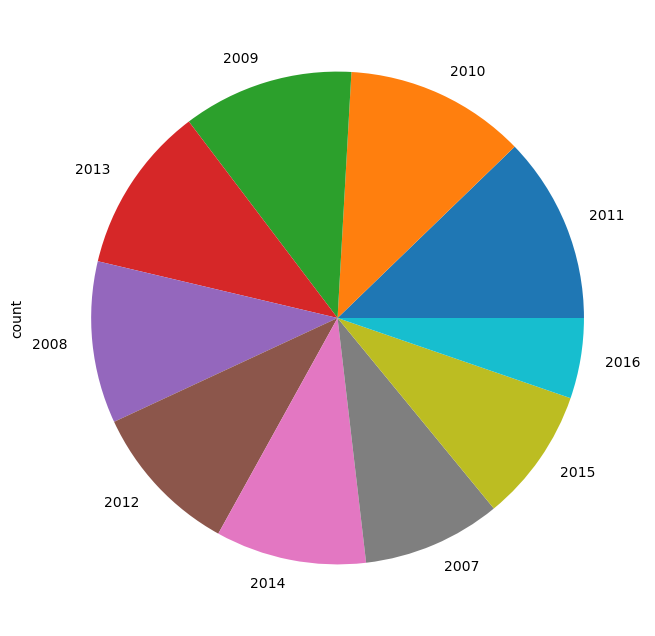

In [78]:
movie_df.query('year >= 2007')['year'].value_counts().plot(kind = 'pie', figsize = (8,8))

In [79]:
df3 = movie_df.query('year >= 2007')
df3['year'].value_counts()

year
2011    167
2010    162
2009    153
2013    150
2008    145
2012    137
2014    135
2007    124
2015    120
2016     72
Name: count, dtype: int64

In [80]:
df4 = df3.groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df4

,profit,popularity,vote_average
year,,,
2007,8.435828e+07,25.390923,6.342742
2008,7.649776e+07,28.153164,6.166207
2009,9.018310e+07,27.413036,6.257516
2010,7.919671e+07,27.235477,6.201852
2011,7.730514e+07,27.169902,6.137725
2012,1.216450e+08,35.457552,6.191241
2013,1.012083e+08,38.822408,6.350667
2014,1.261462e+08,61.606583,6.340741
2015,1.340412e+08,63.820730,6.311667


In [81]:
# Calculate overall mean runtime
df3.runtime.mean()

108.94285714285714

In [82]:
df3.runtime.min()

41.0

In [83]:
df3.runtime.max()

338.0

* Set the ranges:

a. 0-100 for short movies

b. 100-220 for medium movies

c. Greater than 220 for long movies

In [84]:
# Form a dataset for short movies
df3_a = df3.query('runtime < 100').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_a
df3_a.loc[2017] = 0
df3_a

,profit,popularity,vote_average
year,,,
2007,6.894512e+07,20.153460,5.819149
2008,7.679778e+07,23.227106,5.888462
2009,6.326808e+07,25.727978,6.045000
2010,7.029733e+07,25.014156,5.977551
2011,5.366548e+07,21.116826,5.878571
2012,7.380475e+07,27.631410,5.931667
2013,8.510122e+07,32.529389,5.848780
2014,9.396325e+07,39.039240,5.837500
2015,1.193019e+08,59.728594,5.840625


In [85]:
# Form a dataset for medium movies
df3_b= df3.query('(runtime >= 100) & (runtime <220)').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_b
df3_b.loc[2017] = 0

In [86]:
# Form a dataset for long movies
df3_c = df3.query('runtime >= 200').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
df3_c
df3_c.loc[2007] = 0
df3_c.loc[2008] = 0
df3_c.loc[2009] = 0
df3_c.loc[2011] = 0
df3_c.loc[2012] = 0
df3_c.loc[2013] = 0
df3_c.loc[2014] = 0
df3_c.loc[2015] = 0
df3_c.loc[2016] = 0
df3_c.loc[2017] = 0
df3_c

,profit,popularity,vote_average
year,,,
2010,-17128721.0,1.138383,6.7
2007,0.0,0.000000,0.0
2008,0.0,0.000000,0.0
2009,0.0,0.000000,0.0
2011,0.0,0.000000,0.0
2012,0.0,0.000000,0.0
2013,0.0,0.000000,0.0
2014,0.0,0.000000,0.0
2015,0.0,0.000000,0.0


In [87]:
sorter = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{2007: 0,
 2008: 1,
 2009: 2,
 2010: 3,
 2011: 4,
 2012: 5,
 2013: 6,
 2014: 7,
 2015: 8,
 2016: 9,
 2017: 10}

In [88]:
df3_c['year_id'] = df3_c.index
df3_c['year_id'] = df3_c['year_id'].map(sorterIndex)
df3_c

,profit,popularity,vote_average,year_id
year,,,,
2010,-17128721.0,1.138383,6.7,3
2007,0.0,0.000000,0.0,0
2008,0.0,0.000000,0.0,1
2009,0.0,0.000000,0.0,2
2011,0.0,0.000000,0.0,4
2012,0.0,0.000000,0.0,5
2013,0.0,0.000000,0.0,6
2014,0.0,0.000000,0.0,7
2015,0.0,0.000000,0.0,8


In [89]:
df3_c.sort_values('year_id', inplace=True)
df3_c

,profit,popularity,vote_average,year_id
year,,,,
2007,0.0,0.000000,0.0,0
2008,0.0,0.000000,0.0,1
2009,0.0,0.000000,0.0,2
2010,-17128721.0,1.138383,6.7,3
2011,0.0,0.000000,0.0,4
2012,0.0,0.000000,0.0,5
2013,0.0,0.000000,0.0,6
2014,0.0,0.000000,0.0,7
2015,0.0,0.000000,0.0,8


In [90]:
ind2 = np.arange(len(df3_c['year_id']))
width = 0.35
ind2 + 2*width

array([ 0.7,  1.7,  2.7,  3.7,  4.7,  5.7,  6.7,  7.7,  8.7,  9.7, 10.7])

### profit comparisons with runtime

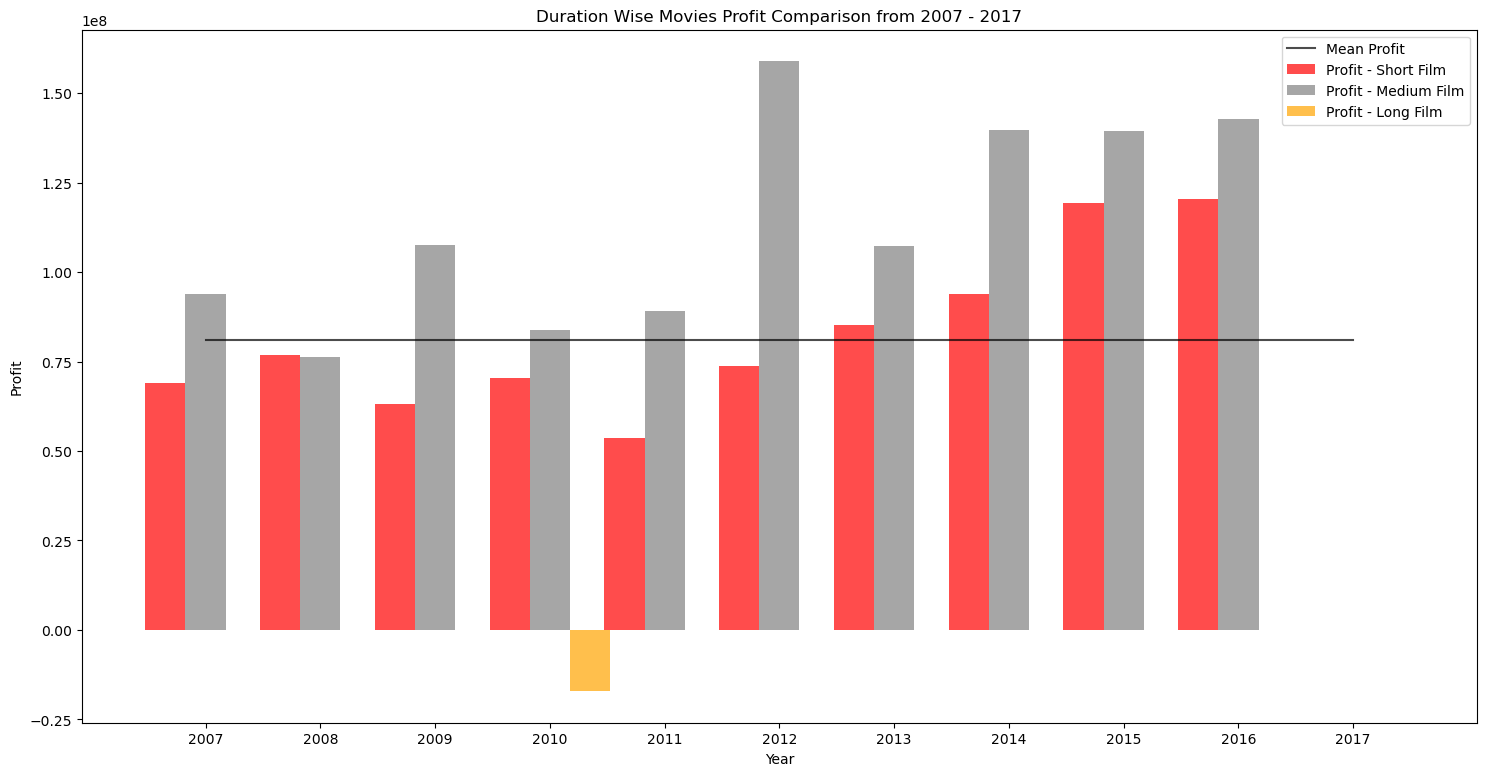

In [91]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
pro1 = plt.bar(ind2, df3_a['profit'], width, color = 'red', alpha=.7, label='Profit - Short Film')
pro2 = plt.bar(ind2 + width, df3_b['profit'], width, color = 'grey', alpha=.7, label='Profit - Medium Film')
pro3 = plt.bar(ind2 + 2*width, df3_c['profit'], width, color = 'orange', alpha=.7, label='Profit - Long Film')
plt.plot(ind2 + width, np.repeat(pf_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Profit')

# Plot the labels, xticks and title
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Duration Wise Movies Profit Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# set the legend
plt.legend()

1. Maximum profit on an average is attained by medium films in 2012.
2. Generally medium films have gained more profits than other category films over the years.
3. Long films have given loss on an average in 2010.
4. Over the years, medium films have gained average profits more than overall profit mean except 2010 and 2017
5. Short films have shown increasing average profit trends over the years with 2015 and 2016 being the years crossing overall profit mean
6. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
7. Short films data is not present for 2017 there were no short films for that year

## popularity comparisons with runtime

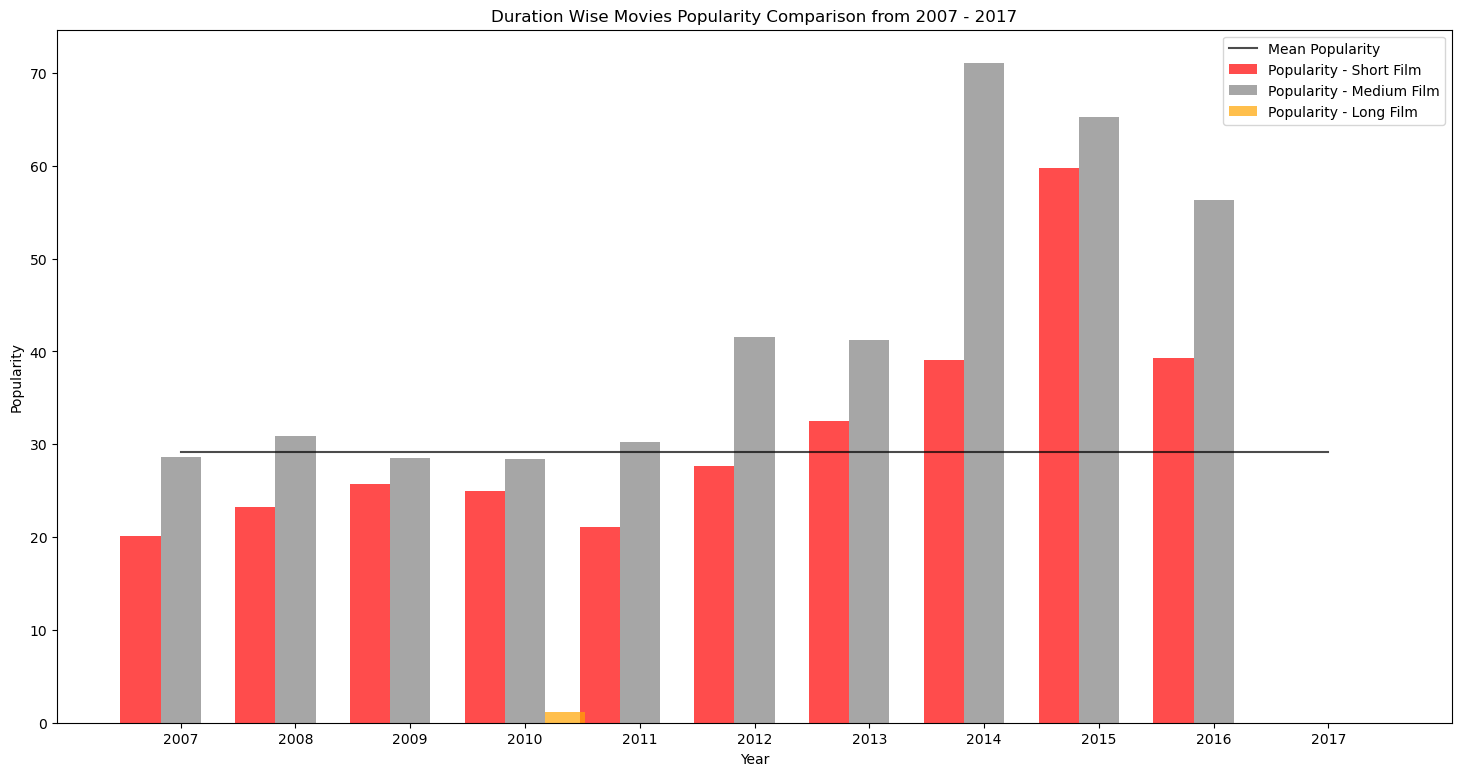

In [92]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
pop1 = plt.bar(ind2, df3_a['popularity'], width, color = 'red', alpha=.7, label='Popularity - Short Film')
pop2 = plt.bar(ind2 + width, df3_b['popularity'], width, color = 'grey', alpha=.7, label='Popularity - Medium Film')
pop3 = plt.bar(ind2 + 2*width, df3_c['popularity'], width, color = 'orange', alpha=.7, label='Popularity - Long Film')
plt.plot(ind2 + width, np.repeat(pt_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Popularity')

# Plot the labels, xticks and title
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.title('Duration Wise Movies Popularity Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# Set the legend
plt.legend()

1. Maximum popularity on an average is attained by medium films in 2014.
2. Generally medium films have gained more popularity than other category films and have shown increasing average popularity trends over the years.
3. Long films have been lowest in terms of popularity over the years.
4. Over all the years, medium films have gained average popularity more than overall popularity mean
5. Short films have shown increasing average popularity trends over the years with 2015 and 2016 being the years crossing overall popularity mean
6. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
7. Short films data is not present for 2017 there were no short films for that year

### vote average comparisons with runtime

In [93]:
# Calculate overall mean of vote averages
vt_mean = movie_df.vote_average.mean()
vt_mean

6.313497506234413

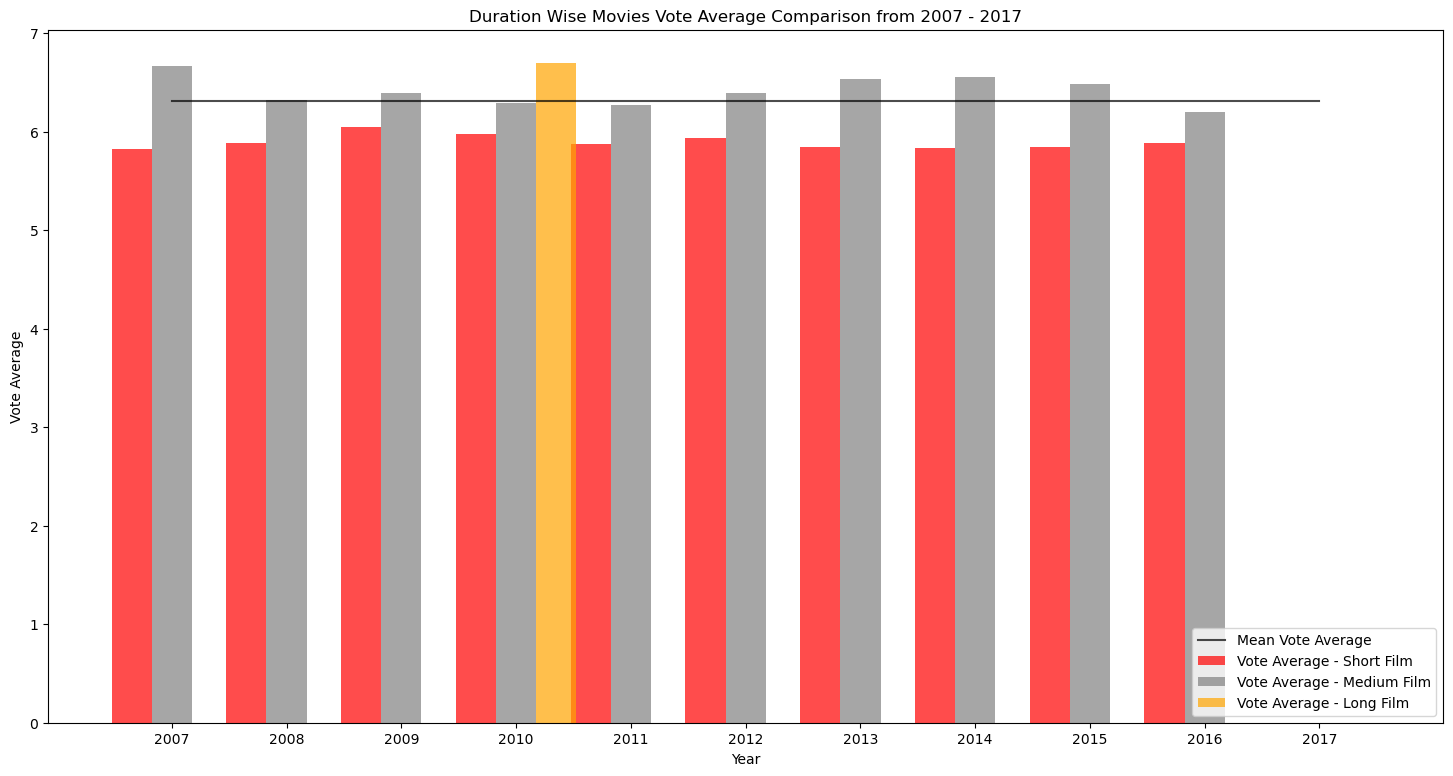

In [94]:
# Set the figure size
plt.figure(figsize=(18, 9))

# Plot the bars and the line
vot1 = plt.bar(ind2, df3_a['vote_average'], width, color = 'red', alpha=.7, label='Vote Average - Short Film')
vot2 = plt.bar(ind2 + width, df3_b['vote_average'], width, color = 'grey', alpha=.7, label='Vote Average - Medium Film')
vot3 = plt.bar(ind2 + 2*width, df3_c['vote_average'], width, color = 'orange', alpha=.7, label='Vote Average - Long Film')
plt.plot(ind2 + width, np.repeat(vt_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Vote Average')

# Plot the labels, xticks and title
plt.ylabel('Vote Average')
plt.xlabel('Year')
plt.title('Duration Wise Movies Vote Average Comparison from 2007 - 2017')
plt.xticks(ind2 + width, df3_c.index)

# Set the legend
plt.legend()

1. Maximum vote rating on an average is attained by long films in 2009 followed by medium films in 2017.
2. Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years
3. Short films data is not present for 2017 there were no short films for that year 
4. Short films have always been below overall mean vote rating on an average for all the years

### Movies budget

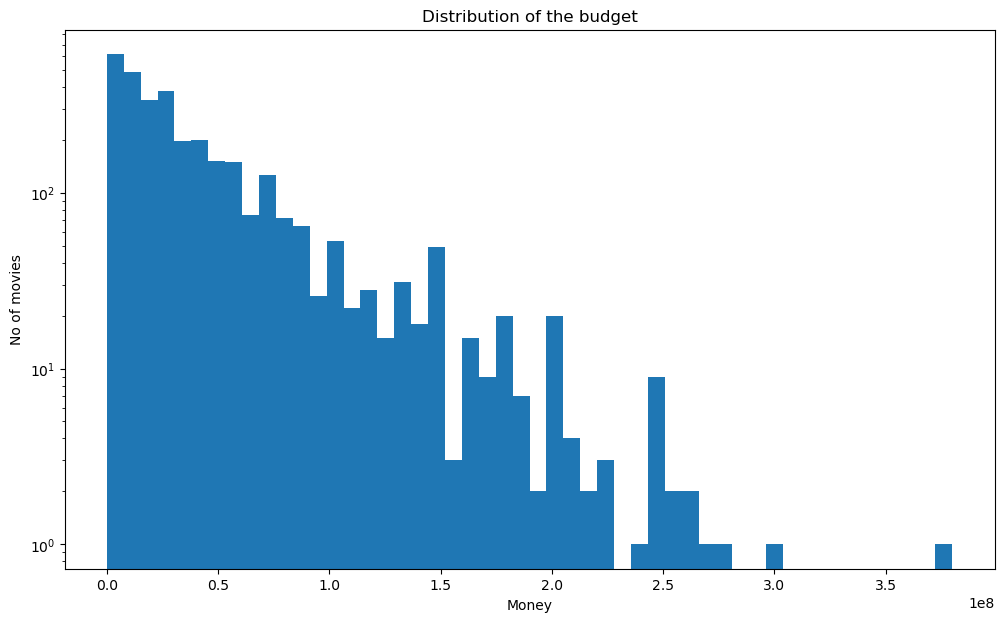

In [95]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['budget'],bins= 50)
plt.title("Distribution of the budget")
plt.xlabel('Money')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

### Revenue

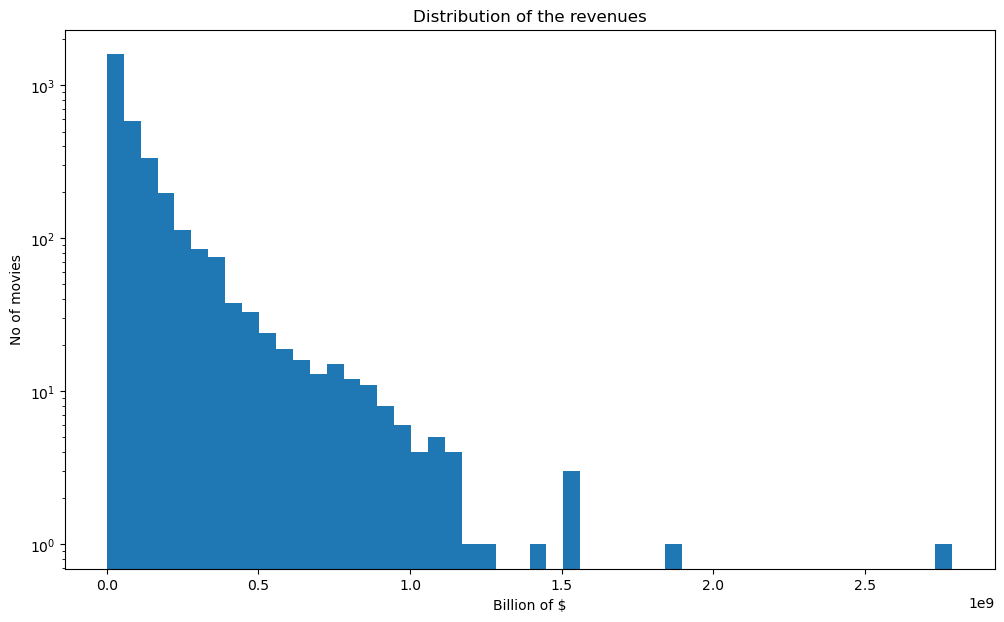

In [96]:
plt.figure(figsize=(12,7))
plt.hist(movie_df['revenue'], bins= 50)
plt.title("Distribution of the revenues")
plt.xlabel('Billion of $')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

## Revenue And Budget

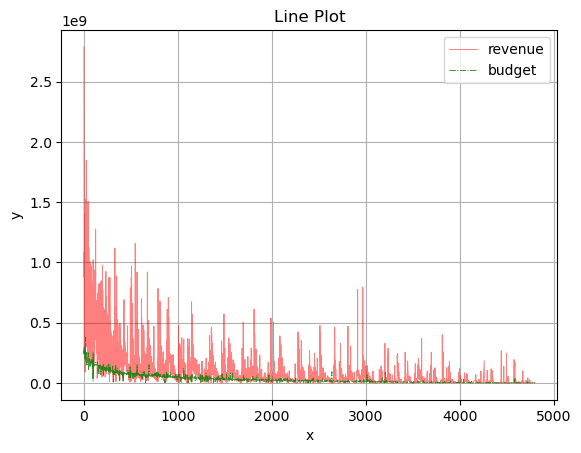

In [97]:
# Line plot
movie_df.revenue.plot(kind='line', color='r', label='revenue', linewidth=.7, alpha=.5, grid=True, linestyle='-' )
movie_df.budget.plot(color='g', label='budget', linewidth=.7, alpha=.8, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()

## Profit And Budget

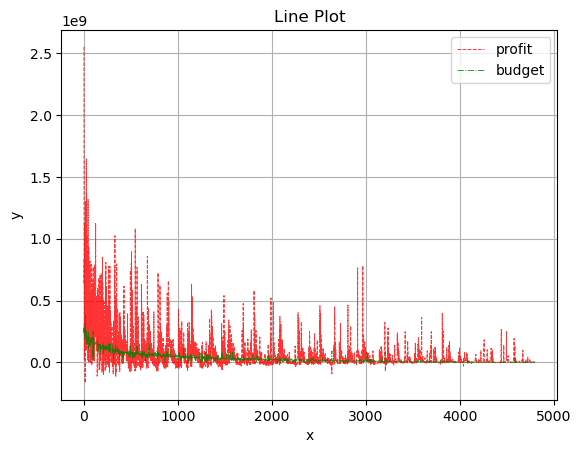

In [98]:
movie_df.profit.plot(color='r', label='profit', linewidth=.7, alpha=.8, grid=True, linestyle='--')
movie_df.budget.plot(color='g', label='budget', linewidth=.7, alpha=.8, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()


### Genres

In [99]:
df_genres = movie_df.explode('genres')
df_genres.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,profit,year,day_of_year,month,date,day
0,237000000,Action,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
0,237000000,Adventure,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
0,237000000,Fantasy,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
0,237000000,Science Fiction,http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,344,12,10,Thursday
1,300000000,Adventure,http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,2007,139,5,19,Saturday


In [100]:
df_genres.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', nan], dtype=object)

In [101]:
count_genres = df_genres.groupby('genres').count()[['id']].sort_values(by='id', ascending=False)
count_genres.head()

,id
genres,
Drama,1427
Comedy,1101
Thriller,929
Action,915
Adventure,660


* Drama has highest no of movies

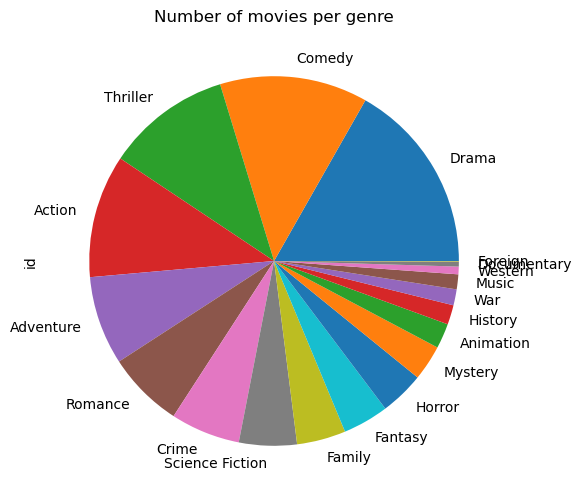

In [102]:
count_genres.plot(kind ='pie',figsize=(10,6),legend = False, subplots = True)
plt.title('Number of movies per genre')
plt.show()

### Genre that make the most money

In [103]:
df_genres_revenue = movie_df[['genres','revenue']].explode('genres')
df_genres_revenue.head()

,genres,revenue
0,Action,2787965087
0,Adventure,2787965087
0,Fantasy,2787965087
0,Science Fiction,2787965087
1,Adventure,961000000


* Action generate highest revenue

C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

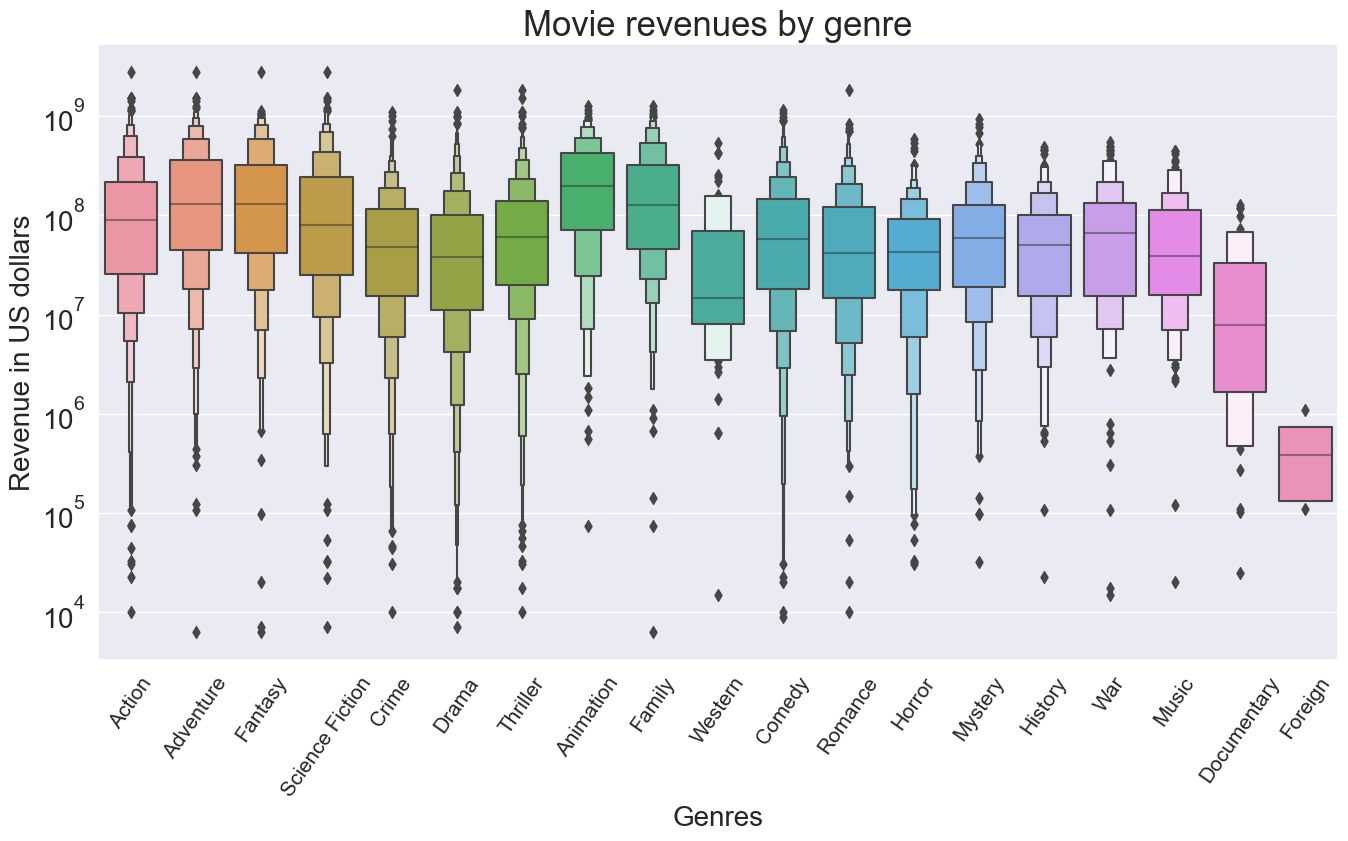

In [104]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_revenue[df_genres_revenue["revenue"]>0].reset_index(),x="genres",y="revenue")
plt.yticks(fontsize=20)
plt.yscale("log")
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Revenue in US dollars",fontsize=20)
plt.title("Movie revenues by genre",fontsize=25)
plt.show()

In [105]:
df_genres_revenue = df_genres_revenue.groupby('genres')[['revenue']].sum()
df_genres_revenue.head()

,revenue
genres,
Action,162316088206
Adventure,163667924225
Animation,52436463168
Comedy,120403594524
Crime,45797218000


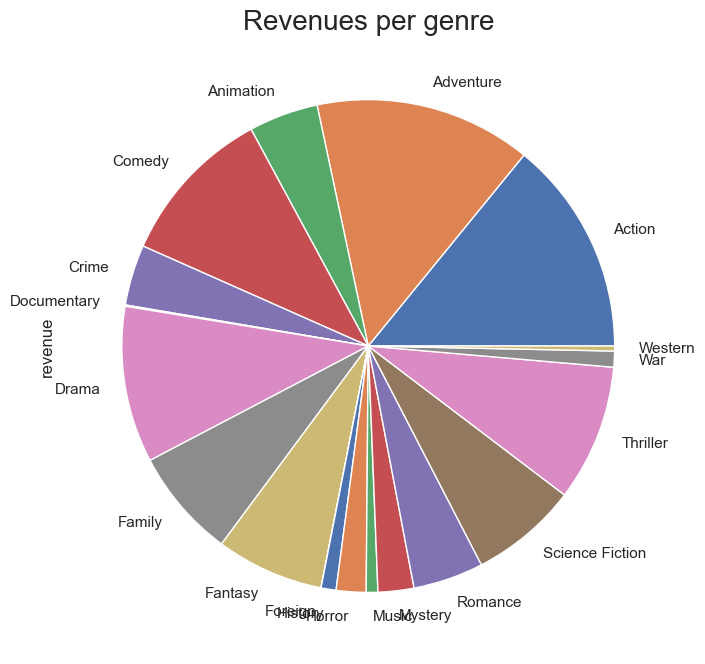

In [106]:

df_genres_revenue.plot(kind ='pie',figsize=(16,8),legend = False, subplots = True)
plt.title('Revenues per genre',fontsize=20)
plt.show()

### Vote Average

In [107]:
df_genres_grade = movie_df[['genres','vote_average']].explode('genres')
df_genres_grade.head()

,genres,vote_average
0,Action,7.2
0,Adventure,7.2
0,Fantasy,7.2
0,Science Fiction,7.2
1,Adventure,6.9


* Action, Adventure, Fantasy have highest voting

In [108]:
df_genres_grade.shape

(8507, 2)

C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shromana\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

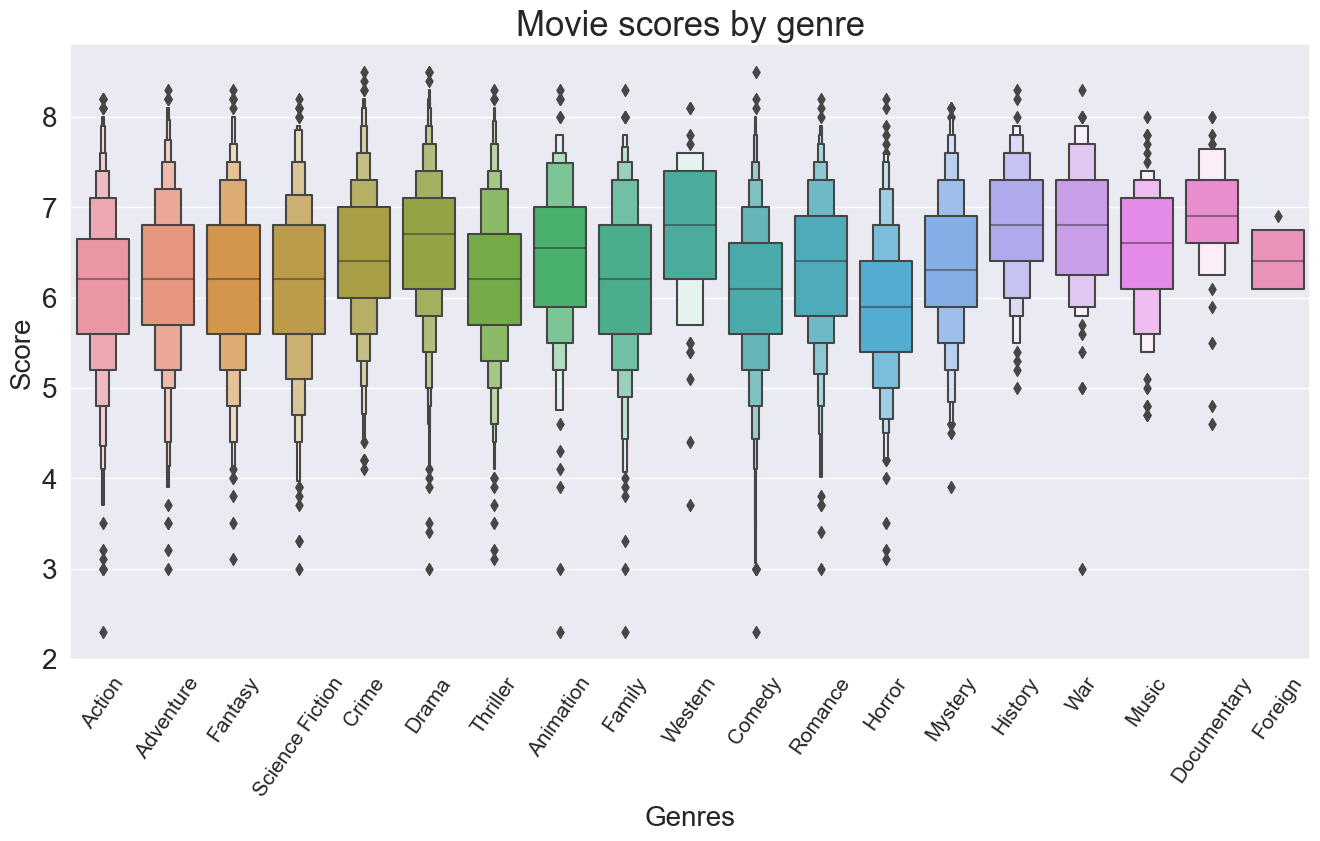

In [109]:
sns.set(style="darkgrid")
f,ax=plt.subplots(figsize=(16, 8))
sns.boxenplot(data=df_genres_grade,x="genres",y="vote_average")
plt.yticks(fontsize=20)
plt.xticks(rotation=55,fontsize=15)
plt.xlabel("Genres",fontsize=20)
plt.ylabel("Score",fontsize=20)
plt.title("Movie scores by genre",fontsize=25)
plt.show()

### Popularity 

Metric computed by TMDB and taking into account : 

* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

In [110]:
df_movie_pop = movie_df[['title','popularity']].sort_values(by='popularity', ascending=False)
df_movie_pop.head()

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564


### Revenue Timeline

In [111]:
df_movie_revenue = movie_df[['title','revenue','release_date']].set_index('release_date').sort_values(by='revenue', ascending=False)
df_movie_revenue.head()

,title,revenue
release_date,,
2009-12-10,Avatar,2787965087
1997-11-18,Titanic,1845034188
2012-04-25,The Avengers,1519557910
2015-06-09,Jurassic World,1513528810
2015-04-01,Furious 7,1506249360


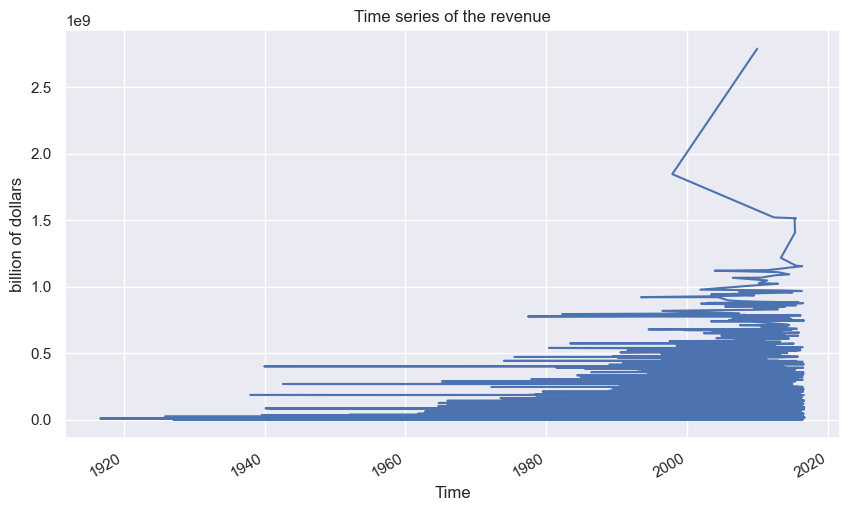

In [112]:
df_movie_revenue.plot(figsize=(10,6),legend = False)
plt.title('Time series of the revenue')
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.show()

In [113]:
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.head()

revenue
genres year          
Action 1930   8000000
       1936   2736000
       1949   7800000
       1950   8000000
       1952  36000000

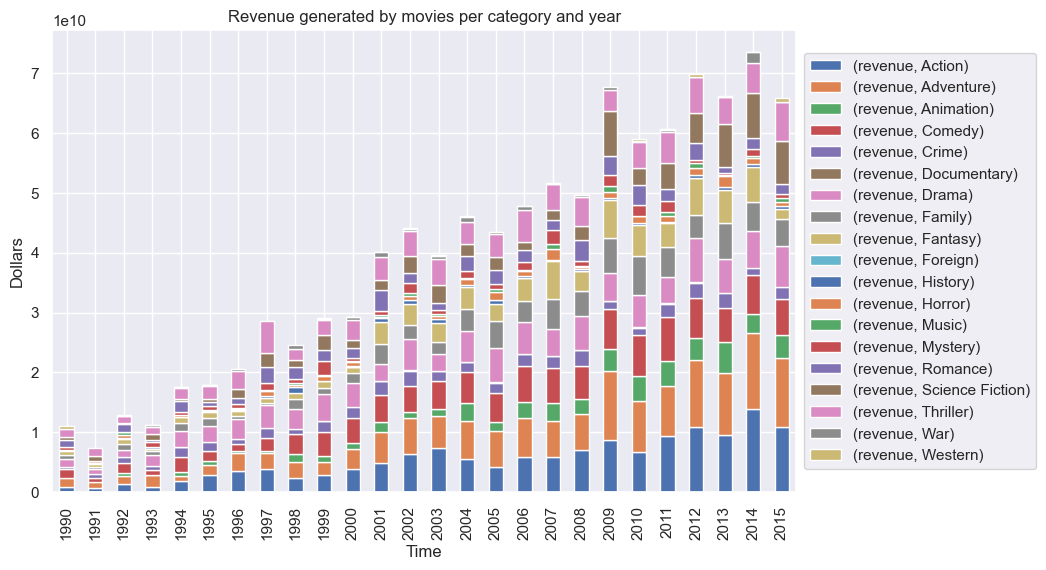

In [114]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

In [115]:
#Statistical Summary
movie_df.year.describe()

count    3208.000000
mean     2001.719140
std        13.199153
min      1916.000000
25%      1998.000000
50%      2005.000000
75%      2010.000000
max      2016.000000
Name: year, dtype: float64

In [116]:
movie_df["budget_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["budget"],x["year"],to=2016),axis=1)
movie_df["revenue_adjusted"]=movie_df.apply(lambda x: cpi.inflate(x["revenue"],x["year"],to=2016),axis=1)

In [117]:
df_movie_revenue_adjusted = movie_df[['title','revenue_adjusted','release_date']].set_index('release_date').sort_values(by='revenue_adjusted', ascending=False)
df_movie_revenue_adjusted.head()

,title,revenue_adjusted
release_date,,
1939-12-15,Gone with the Wind,6.909723e+09
1942-08-14,Bambi,3.937987e+09
2009-12-10,Avatar,3.118954e+09
1937-12-20,Snow White and the Seven Dwarfs,3.082181e+09
1977-05-25,Star Wars,3.070973e+09


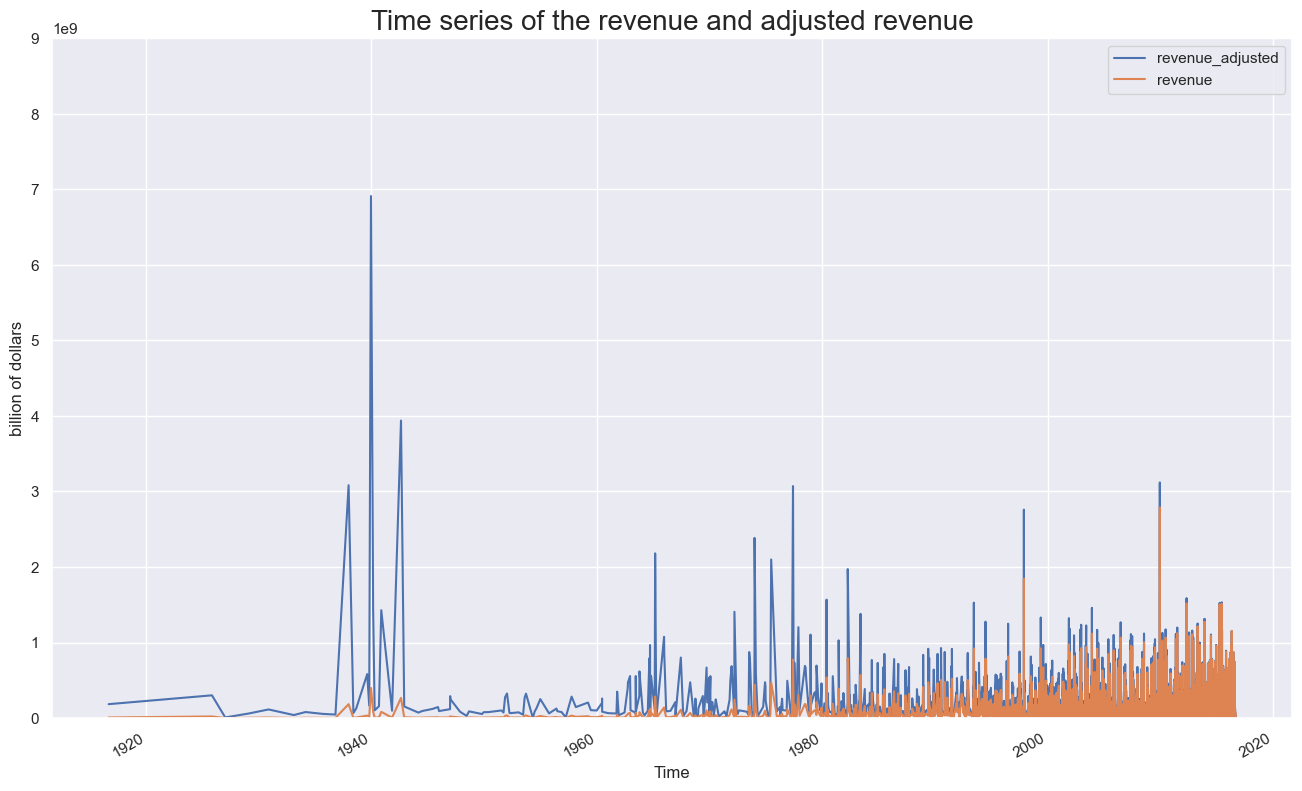

In [118]:
df_movie_revenue_adjusted.reset_index(
    ).merge(df_movie_revenue,how="inner").set_index("release_date").sort_index().drop(columns=["title"]).plot(figsize=(16,10))
plt.title('Time series of the revenue and adjusted revenue',fontsize=20)
plt.xlabel("Time")
plt.ylabel("billion of dollars")
plt.ylim(0,9e9)
i=0
for index , row in df_movie_revenue_adjusted[:11].iterrows():
    i+=1
    y=row["revenue_adjusted"]
    #plt.annotate(s=str(i)+". "+row["title"],xy=(index,y),rotation=65,xytext=(index,y+10000000))
plt.show()

**Movies below the line recorded a loss**

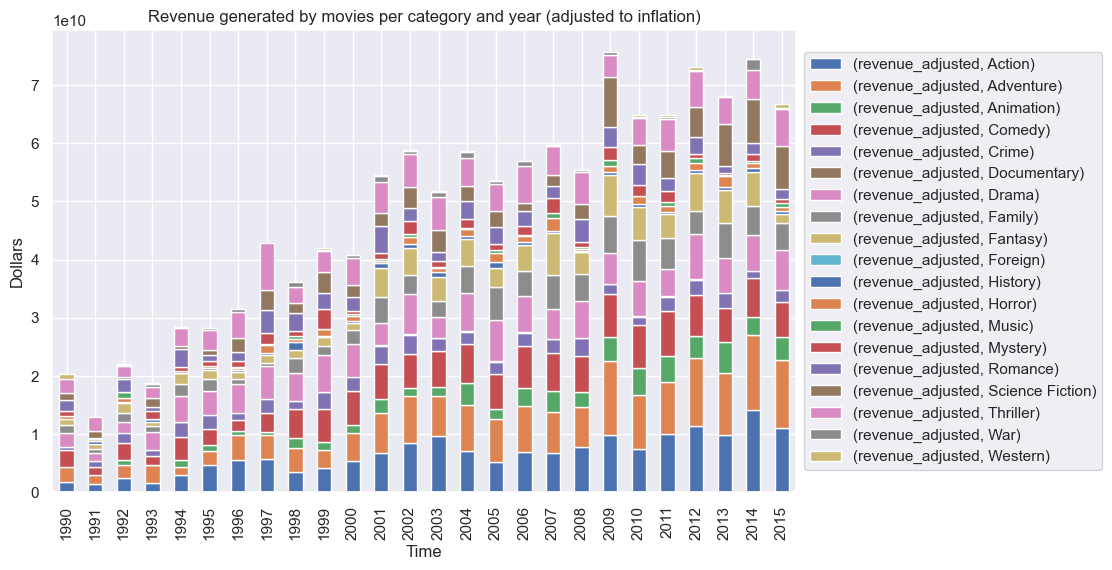

In [119]:
fig = plt.figure()
ax = plt.subplot(111)

starting_year = 1990
df_genres_revenue_year = movie_df[['genres','revenue_adjusted','year']].explode('genres').groupby(['genres','year']).sum()
df_genres_revenue_year.unstack(level=0).fillna(0).loc[starting_year:2015].plot(kind = 'bar',stacked=True, ax=ax, figsize=(12,6),legend  = True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Revenue generated by movies per category and year (adjusted to inflation)')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

#### Revenue and vote average

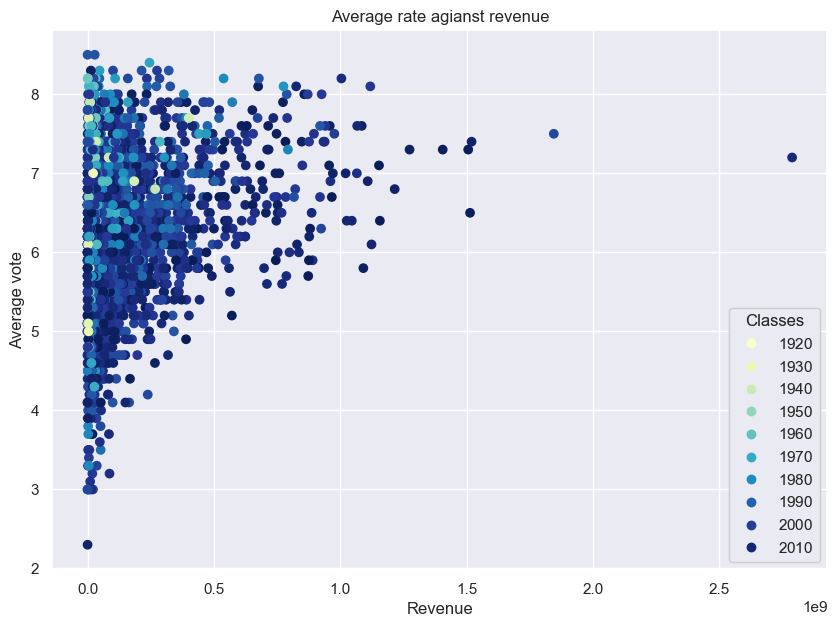

In [120]:
fig, ax = plt.subplots(figsize=(10,7))
scatter = ax.scatter( movie_df['revenue'],movie_df['vote_average'], c =movie_df['year'],cmap='YlGnBu', marker  ='o')


legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)

plt.title('Average rate agianst revenue')
plt.xlabel('Revenue')
plt.ylabel('Average vote')
plt.show()

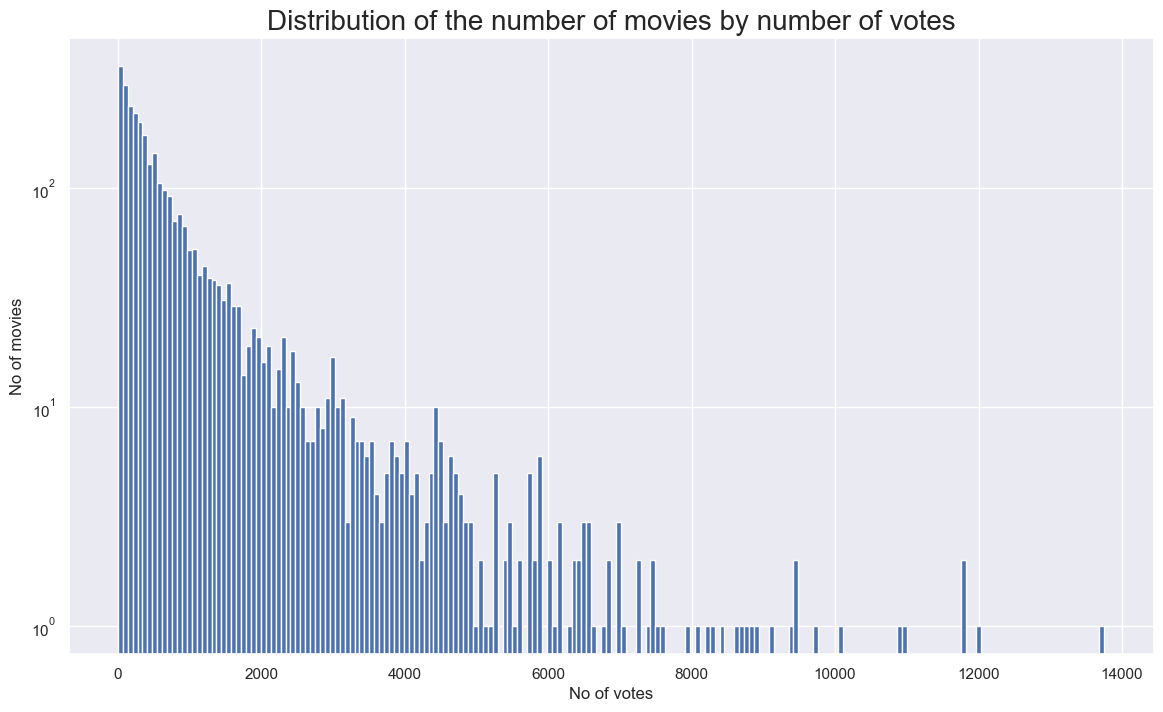

In [121]:
plt.figure(figsize=(14,8))
plt.hist(movie_df['vote_count'],200)
plt.title('Distribution of the number of movies by number of votes',fontsize=20)
plt.xlabel('No of votes')
plt.ylabel('No of movies')
plt.yscale("log")
plt.show()

### Production companies

In [122]:
df_movie_prod = movie_df[['production_companies','id']].explode('production_companies')
df_movie_prod = df_movie_prod.groupby('production_companies').count().sort_values(by='id', ascending=False)
df_movie_prod.columns=["count"]
df_movie_prod

,count
production_companies,
Warner Bros.,280
Universal Pictures,272
Paramount Pictures,242
Twentieth Century Fox Film Corporation,201
Columbia Pictures,167
...,...
Hit & Run Productions,1
Hobby Films,1
Hokkaido Broadcasting Co.,1


*  Warner Bros has released highest no of movies.

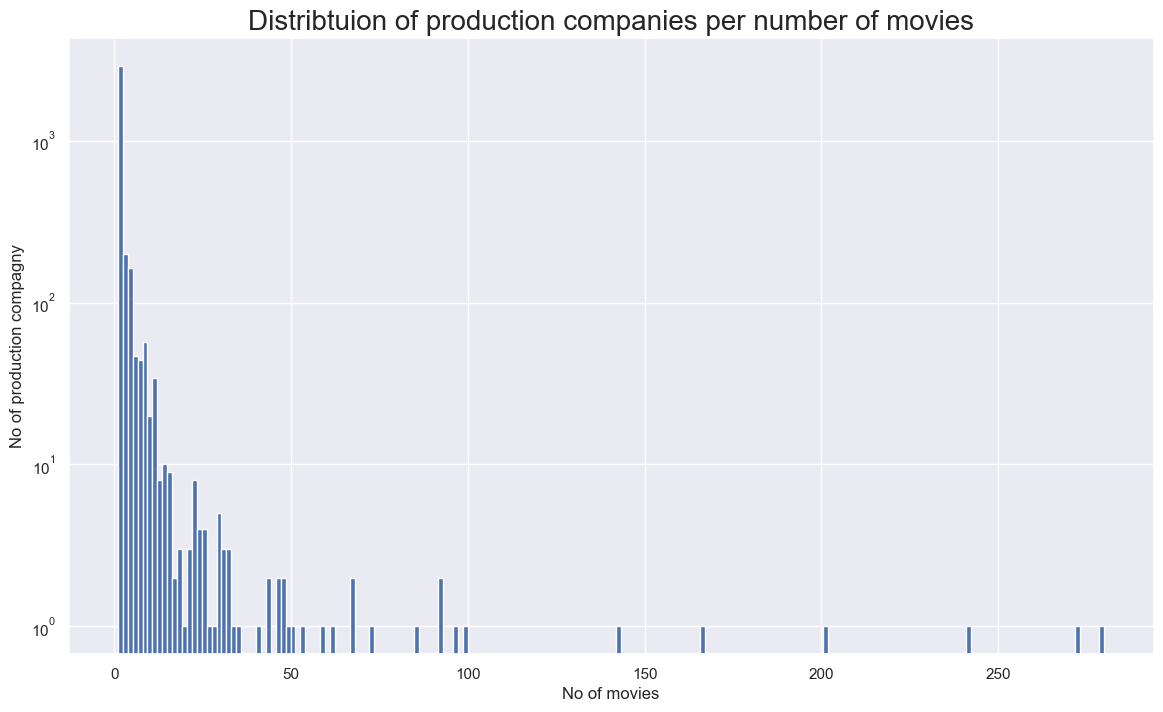

In [123]:

plt.figure(figsize=(14,8))
plt.hist(df_movie_prod['count'],200)
plt.title('Distribtuion of production companies per number of movies',fontsize=20)
plt.ylabel('No of production compagny')
plt.xlabel('No of movies')
plt.yscale("log")
plt.show()

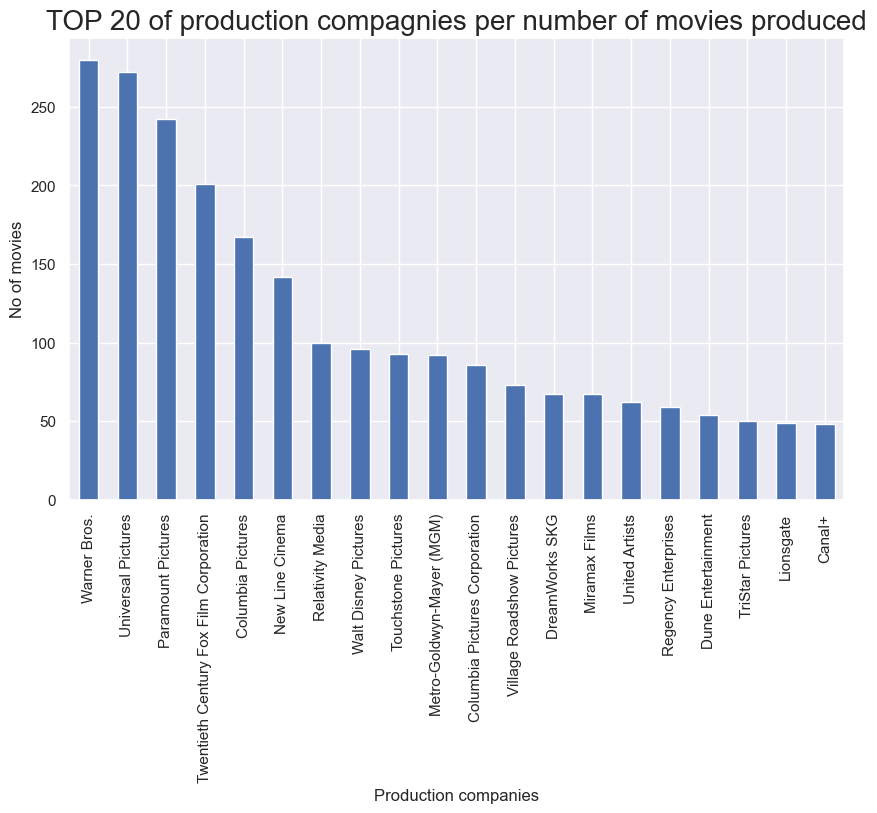

In [124]:
df_movie_prod[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of production compagnies per number of movies produced',fontsize=20)
plt.xlabel("Production companies")
plt.ylabel("No of movies")
plt.show()

In [125]:
df_movie_revenue = movie_df[['production_companies','revenue']].explode('production_companies')

In [126]:
df_movie_revenue_sum = df_movie_revenue.groupby('production_companies').sum().sort_values(by='revenue', ascending=False)
df_movie_revenue_sum.head()

,revenue
production_companies,
Warner Bros.,48822074563
Universal Pictures,42394603321
Paramount Pictures,40514725671
Twentieth Century Fox Film Corporation,39136501776
Columbia Pictures,28526534603


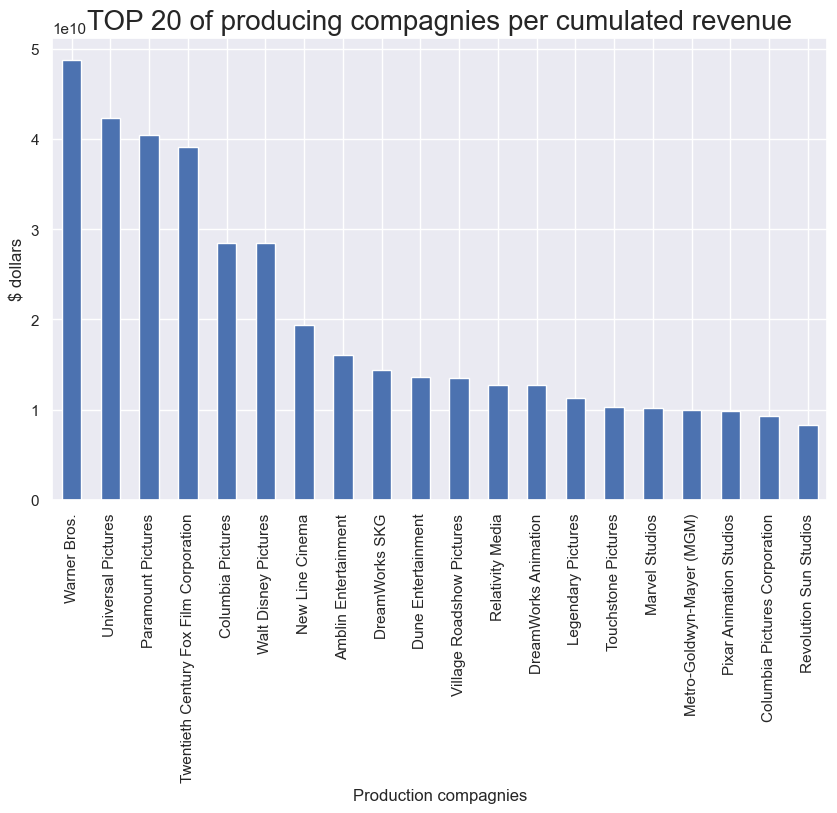

In [127]:
df_movie_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per cumulated revenue',fontsize=20)
plt.xlabel("Production compagnies")
plt.ylabel("$ dollars")
plt.show()

In [128]:
df_movie_revenue_avg = df_movie_revenue.groupby('production_companies').mean().sort_values(by='revenue', ascending=False)
df_movie_revenue_avg.head()

,revenue
production_companies,
Québec Production Services Tax Credit,1.506249e+09
Abu Dhabi Film Commission,1.506249e+09
"Colorado Office of Film, Television & Media",1.506249e+09
Prime Focus,1.405404e+09
Vita-Ray Dutch Productions (III),1.153304e+09


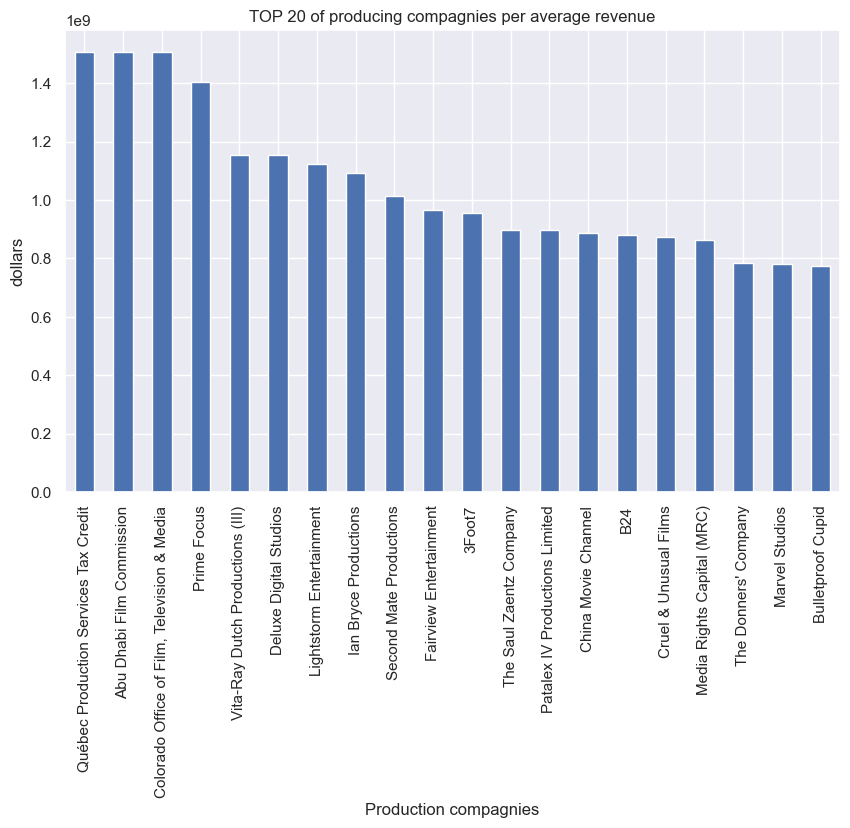

In [129]:
df_movie_revenue_avg[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of producing compagnies per average revenue')
plt.xlabel("Production compagnies")
plt.ylabel("dollars")
plt.show()

### keeping the most important companies as it's a categorical features

In [130]:
interesting_prod = df_movie_prod.head(20).index.values
movie_df.production_companies = movie_df.production_companies.apply(lambda x :[prod for prod in x if prod in interesting_prod])
movie_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,profit,year,day_of_year,month,date,day,budget_adjusted,revenue_adjusted
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Twentieth Century Fox Film Corporation, Dune ...",...,7.2,11800,2550965087,2009,344,12,10,Thursday,2.651368e+08,3.118954e+09
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,[Walt Disney Pictures],...,6.9,4500,661000000,2007,139,5,19,Saturday,3.472625e+08,1.112398e+09
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,[Columbia Pictures],...,6.3,4466,635674609,2015,299,10,26,Monday,2.480907e+08,8.917844e+08
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,[Warner Bros.],...,7.6,9106,834939099,2012,198,7,16,Monday,2.613385e+08,1.134145e+09
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,6.1,2124,24139100,2012,67,3,7,Wednesday,2.717920e+08,2.970259e+08


## Insights

1. Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
2. Most movies were made in the months of January and December
3. Most movies have popularity between 0 to 100 
4. Many movies have negative profit values which suggests loss making movies
5. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
6. Most movies have runtime in the range of 75 to 150 
7. Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average
8. Most movies have been released between the years 2000 and 2015

### Actors 

In [131]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[[Sam Worthington, 2], [Zoe Saldana, 1], [Sigo...","[[Stephen E. Rivkin, Editor, Editing, 0], [Ric..."
1,285,Pirates of the Caribbean: At World's End,"[[Johnny Depp, 2], [Orlando Bloom, 2], [Keira ...","[[Dariusz Wolski, Director of Photography, Cam..."
2,206647,Spectre,"[[Daniel Craig, 2], [Christoph Waltz, 2], [Léa...","[[Thomas Newman, Original Music Composer, Soun..."
3,49026,The Dark Knight Rises,"[[Christian Bale, 2], [Michael Caine, 2], [Gar...","[[Hans Zimmer, Original Music Composer, Sound,..."
4,49529,John Carter,"[[Taylor Kitsch, 2], [Lynn Collins, 1], [Saman...","[[Andrew Stanton, Screenplay, Writing, 2], [An..."


In [132]:
df_actors = credits_df.set_index('title').cast.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'cast'})
df_actors.head()

,title,cast
0,Avatar,"[Sam Worthington, 2]"
1,Avatar,"[Zoe Saldana, 1]"
2,Avatar,"[Sigourney Weaver, 1]"
3,Avatar,"[Stephen Lang, 2]"
4,Avatar,"[Michelle Rodriguez, 1]"


In [133]:
df_actors['actor'] = df_actors['cast'].map(lambda x: x[0])
df_actors['actor_gender']  = df_actors['cast'].map(lambda x: x[1])
df_actors.drop(columns = 'cast',inplace = True)
df_actors.head()

,title,actor,actor_gender
0,Avatar,Sam Worthington,2
1,Avatar,Zoe Saldana,1
2,Avatar,Sigourney Weaver,1
3,Avatar,Stephen Lang,2
4,Avatar,Michelle Rodriguez,1


In [134]:
df_actors.actor.nunique()

54201

### Drop Missing Values

In [135]:
df_actor_movie = df_actors.merge(movie_df, on='title', how='left').dropna()
df_actor_movie.head()

,title,actor,actor_gender,budget,genres,homepage,id,keywords,original_language,original_title,...,vote_average,vote_count,profit,year,day_of_year,month,date,day,budget_adjusted,revenue_adjusted
0,Avatar,Sam Worthington,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
1,Avatar,Zoe Saldana,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
2,Avatar,Sigourney Weaver,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
3,Avatar,Stephen Lang,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
4,Avatar,Michelle Rodriguez,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",en,Avatar,...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09


### Earning by Gender

Text(0, 0.5, 'Mean revenue in Billion dollars')

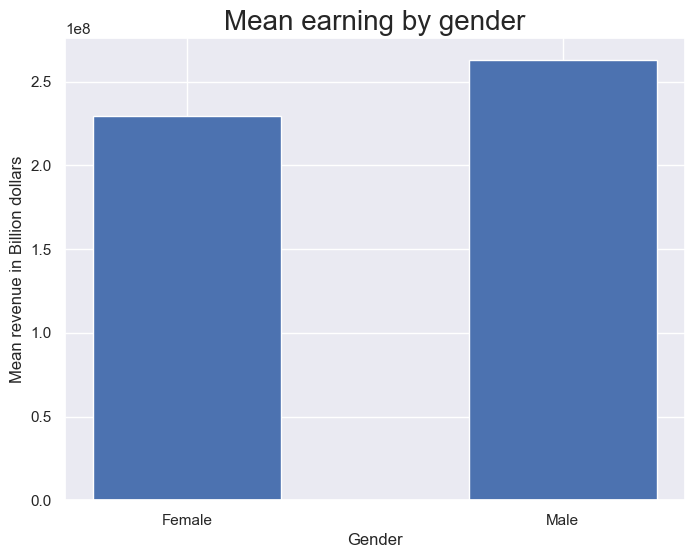

In [136]:
gender_plot=df_actor_movie.groupby('actor_gender')[['revenue']].mean()[1:]
f,ax=plt.subplots(figsize=(8,6))
plt.bar(["Female","Male"],gender_plot["revenue"],width=0.5)
plt.title("Mean earning by gender",fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Mean revenue in Billion dollars")

* Mean earning of males is more

In [137]:
gender_plot

,revenue
actor_gender,
1,2.295606e+08
2,2.628484e+08


In [138]:
gender_plot=df_actor_movie.groupby(['actor_gender',"year"])[['revenue']].mean()
gender_plot.unstack(level=0).fillna(0)#.drop(columns=#.plot(kind = 'bar',stacked=True, figsize=(12,6),legend  = True)
#plt.show()

revenue                            
actor_gender             0             1             2
year                                                  
1937.0        1.849255e+08  1.849255e+08  1.849255e+08
1939.0        3.375497e+07  3.375497e+07  3.375497e+07
1940.0        8.332000e+07  0.000000e+00  8.332000e+07
1942.0        2.674472e+08  2.674472e+08  2.674472e+08
1962.0        5.960000e+07  5.960000e+07  5.960000e+07
1963.0        7.889876e+07  7.889876e+07  7.889876e+07
1964.0        8.394237e+07  1.061175e+08  8.266304e+07
1965.0        0.000000e+00  1.411957e+08  1.411957e+08
1966.0        6.000000e+06  0.000000e+00  6.000000e+06
1967.0        1.115848e+08  1.115848e+08  1.115848e+08
1969.0        8.197449e+07  8.197449e+07  8.197449e+07
1970.0        4.000000e+07  4.000000e+07  4.000000e+07
1971.0        4.400558e+07  1.160195e+08  9.361520e+07
1972.0        2.450664e+08  2.450664e+08  2.450664e+08
1973.0        3.015420e+08  3.481300e+08  2.922244e+08
1974.0        9.757200e+07  9.757200e+07  9.757200e+07
1975.0        2.711004e+08  2.637095e+08  3.063157e+08
1977.0        7.192114e+08  4.066734e+08  6.094719e+08
1978.0        1.165172e+08  1.055000e+08  1.154400e+08
1979.0        1.476165e+08  1.376245e+08  1.178747e+08
1980.0        4.493423e+08  1.563794e+08  4.013709e+08
1981.0        2.610155e+08  1.451146e+08  1.976007e+08
1982.0        5.385278e+08  3.180537e+08  9.026184e+07
1983.0        3.825669e+08  2.414255e+08  2.977633e+08
1984.0        2.768319e+08  1.147467e+08  2.198316e+08
1985.0        2.251980e+08  2.432205e+08  2.722498e+08
1986.0        1.100000e+07  1.100000e+07  1.100000e+07
1987.0        1.707770e+08  1.274082e+08  1.080927e+08
1988.0        8.187281e+06  1.079368e+07  1.098822e+07
1989.0        3.567475e+08  2.554880e+08  2.970196e+08
1990.0        1.374454e+08  1.663010e+08  1.792960e+08
1991.0        7.434726e+06  7.434726e+06  7.434726e+06
1992.0        1.909815e+08  3.079510e+08  2.575578e+08
1993.0        3.424594e+08  2.248870e+08  5.511368e+08
1994.0        2.626244e+08  3.558316e+08  3.823998e+08
1995.0        2.531791e+08  1.783503e+08  2.088363e+08
1996.0        1.911339e+08  1.165967e+08  1.551782e+08
1997.0        7.853158e+08  7.688350e+08  6.173689e+08
1998.0        8.029016e+07  1.592071e+08  9.493575e+07
1999.0        2.803258e+08  2.377576e+08  2.453274e+08
2000.0        1.118620e+08  1.105699e+08  1.307231e+08
2001.0        3.774534e+08  3.005035e+08  3.232307e+08
2002.0        2.763334e+08  2.728733e+08  2.990508e+08
2003.0        2.635343e+08  1.987132e+08  2.633589e+08
2004.0        2.429115e+08  2.030079e+08  2.325863e+08
2005.0        2.639256e+08  1.679993e+08  2.214672e+08
2006.0        2.068760e+08  1.364788e+08  1.935160e+08
2007.0        2.655684e+08  2.411973e+08  2.484655e+08
2008.0        2.814613e+08  1.741627e+08  2.074447e+08
2009.0        2.982783e+08  2.269196e+08  2.345395e+08
2010.0        1.785022e+08  1.811904e+08  1.888115e+08
2011.0        1.631113e+08  1.430320e+08  1.933340e+08
2012.0        3.265101e+08  2.575735e+08  3.680976e+08
2013.0        3.458771e+08  3.369184e+08  3.180494e+08
2014.0        3.101392e+08  3.006918e+08  3.826671e+08
2015.0        3.136056e+08  3.254035e+08  3.294777e+08
2016.0        3.231625e+08  2.886579e+08  3.303914e+08

In [139]:
df_actor_movie_count = df_actor_movie.groupby('actor')[['id']].count().sort_values(by ='id',ascending = False)
df_actor_movie_count.columns=["count"]
df_actor_movie_count.head()

,count
actor,
Samuel L. Jackson,29
Matt Damon,26
Morgan Freeman,23
Bill Hader,23
Jonah Hill,22


In [140]:
df_nb_actors = df_actors.groupby('title')[['actor']].count().sort_values(by='actor',ascending = False)
df_nb_actors.rename(columns={"actor": "# of actors"},inplace = True)
df_nb_actors.head(10)

,# of actors
title,
Rock of Ages,224
Mr. Smith Goes to Washington,213
Les Misérables,208
Jason Bourne,208
You Don't Mess with the Zohan,183
Real Steel,172
Star Trek,168
Oz: The Great and Powerful,159
The Dark Knight Rises,158


* Rock of Ages has highest no of actors

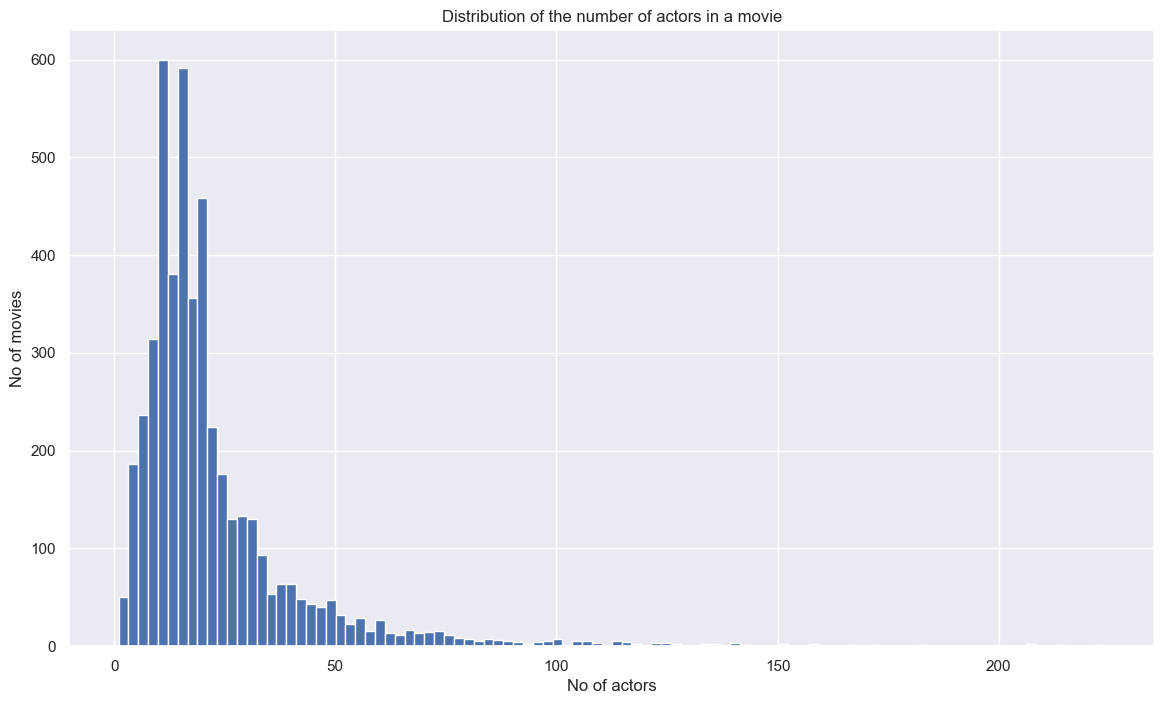

In [141]:
plt.figure(figsize=(14,8))
plt.hist(df_nb_actors['# of actors'],100)
plt.title('Distribution of the number of actors in a movie')
plt.ylabel('No of movies')
plt.xlabel('No of actors')
plt.show()

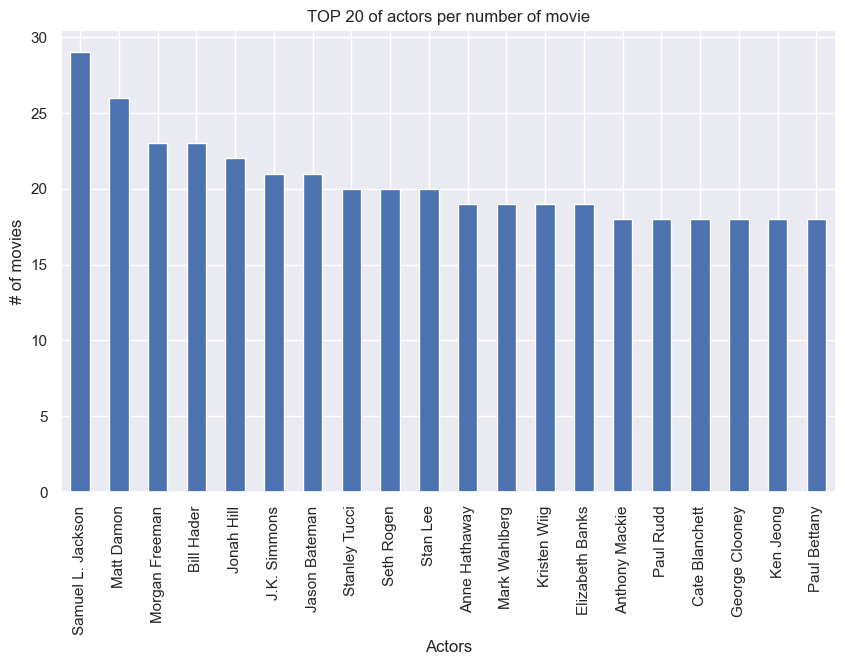

In [142]:
df_actor_movie_count[:20].plot(kind ="bar",figsize=(10,6),legend = False)
plt.title('TOP 20 of actors per number of movie')
plt.ylabel("# of movies")
plt.xlabel("Actors")
plt.show()

In [143]:
df_actor_revenue_sum = df_actor_movie.groupby('actor')[['revenue']].sum().sort_values(by ='revenue',ascending = False)
df_actor_revenue_sum.head()

,revenue
actor,
Stan Lee,1.590812e+10
Samuel L. Jackson,1.253272e+10
Frank Welker,9.815289e+09
Hugo Weaving,9.335319e+09
Cate Blanchett,8.923467e+09


Stan Lee generate highest revenue

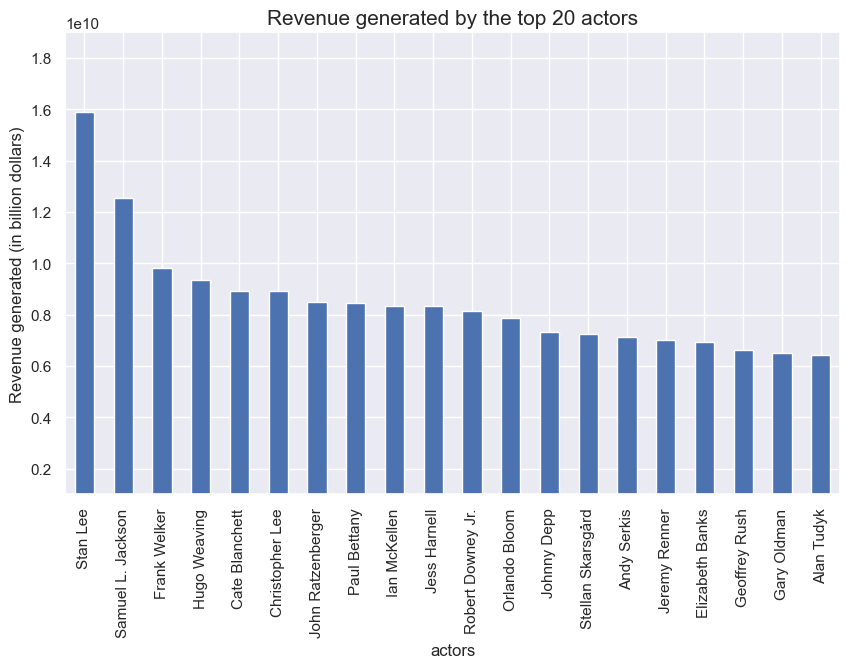

In [144]:
df_actor_revenue_sum[:20].plot(kind ="bar",figsize=(10,6),legend = False)

plt.title('Revenue generated by the top 20 actors',fontsize=15)
plt.ylabel("Revenue generated (in billion dollars)")
plt.xlabel("actors")
plt.ylim(1e9,1e10+9e9)
plt.show()

In [145]:
df_actor_vote = df_actor_movie.groupby('actor')[['vote_average']].mean().sort_values(by ='vote_average',ascending = False)
df_actor_vote.head()

,vote_average
actor,
Victor Rendina,8.4
Nick Vallelonga,8.4
Joseph Medaglia,8.4
Sterling Hayden,8.4
Tony Giorgio,8.4


* Victor Rendina get highest rating

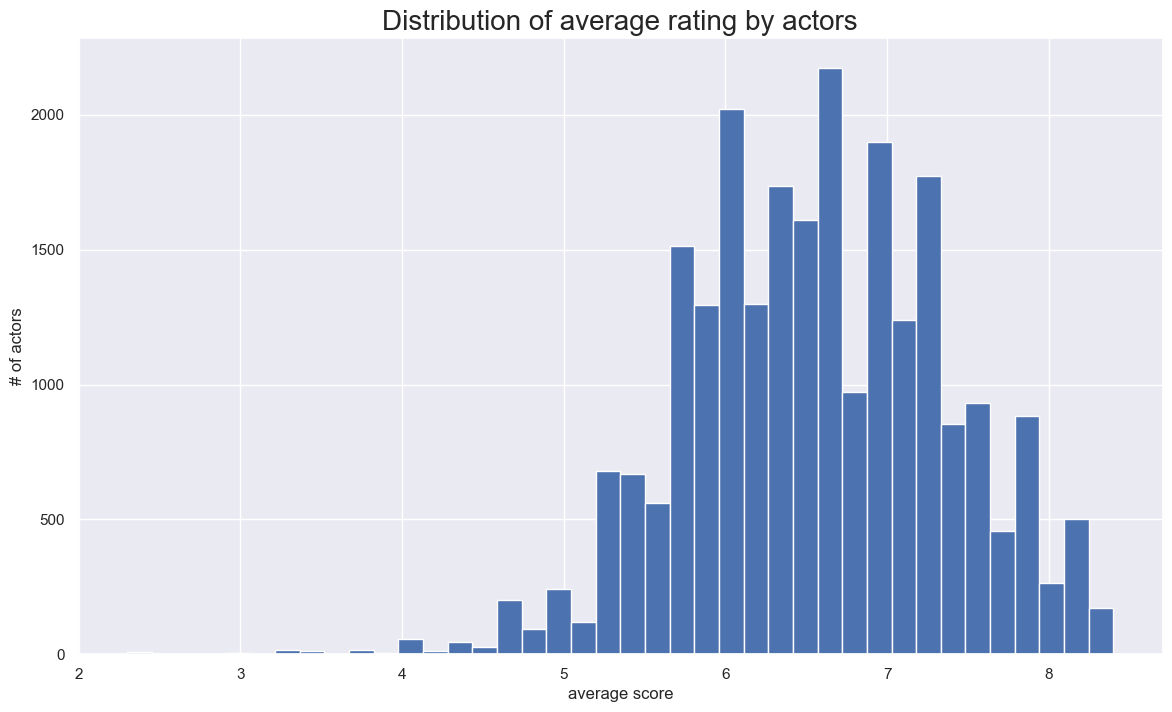

In [146]:
plt.figure(figsize=(14,8))
plt.hist(df_actor_vote['vote_average'],40)
plt.title('Distribution of average rating by actors',fontsize=20)
plt.xlabel('average score')
plt.ylabel('# of actors')
plt.show()

In [147]:
df_actor_movie['actor_gender'].value_counts()

actor_gender
2    16330
0    13083
1     8326
Name: count, dtype: int64

The industry is dominated by men.

### selecting top 500 actors.

In [148]:
actors_top500 = df_actor_movie_count.head(500).index.values

### Crew 

In [149]:
df_crew = credits_df.set_index('title').crew.apply(pd.Series).stack().reset_index(level= 0).rename(columns={0:'crew'})
df_crew.head()

,title,crew
0,Avatar,"[Stephen E. Rivkin, Editor, Editing, 0]"
1,Avatar,"[Rick Carter, Production Design, Art, 2]"
2,Avatar,"[Christopher Boyes, Sound Designer, Sound, 0]"
3,Avatar,"[Christopher Boyes, Supervising Sound Editor, ..."
4,Avatar,"[Mali Finn, Casting, Production, 1]"


In [150]:
df_crew['crew_name'] = df_crew['crew'].map(lambda x: x[0])
df_crew['crew_job']  = df_crew['crew'].map(lambda x: x[1])
df_crew['crew_department']  = df_crew['crew'].map(lambda x: x[2])
df_crew['crew_gender']  = df_crew['crew'].map(lambda x: x[3])
df_crew.drop(columns = 'crew',inplace = True)
df_crew.head()

,title,crew_name,crew_job,crew_department,crew_gender
0,Avatar,Stephen E. Rivkin,Editor,Editing,0
1,Avatar,Rick Carter,Production Design,Art,2
2,Avatar,Christopher Boyes,Sound Designer,Sound,0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0
4,Avatar,Mali Finn,Casting,Production,1


In [151]:
df_crew.nunique()

title               4772
crew_name          52234
crew_job             418
crew_department       12
crew_gender            3
dtype: int64

In [152]:
df_crew.crew_job.value_counts()[:10]

crew_job
Producer                   10206
Executive Producer          6177
Director                    5166
Screenplay                  5010
Editor                      4699
Casting                     4447
Director of Photography     3676
Art Direction               3338
Original Music Composer     3154
Production Design           2837
Name: count, dtype: int64

In [153]:
df_crew.crew_department.value_counts()

crew_department
Production           27675
Sound                16176
Art                  14853
Crew                 13826
Costume & Make-Up    11188
Writing              10688
Camera                9204
Directing             8149
Editing               7855
Visual Effects        7553
Lighting              2410
Actors                   4
Name: count, dtype: int64

In [154]:
df_crew.crew_gender.value_counts()

crew_gender
0    74817
2    43000
1    11764
Name: count, dtype: int64

In [155]:
df_crew.groupby('crew_name')[['title']].count().sort_values(by='title', ascending=False).head()

,title
crew_name,
Robert Rodriguez,104
Steven Spielberg,84
Avy Kaufman,83
Mary Vernieu,82
Deborah Aquila,75


In [156]:
df_top_dep_crew=df_crew.groupby(['crew_department','crew_name'])[['title']].count().sort_values(by='title', ascending=False)
df_top_dep_crew.head(30)

title
crew_department crew_name                 
Production      Avy Kaufman             83
                Mary Vernieu            82
                Deborah Aquila          75
Sound           James Newton Howard     69
                Hans Zimmer             68
Production      Harvey Weinstein        68
                Tricia Wood             67
                Bob Weinstein           67
                Francine Maisler        63
Sound           John Debney             60
                Danny Elfman            57
Production      Kerry Barden            55
Sound           Kevin Kaska             54
Production      Arnon Milchan           54
                Scott Rudin             54
Sound           Christophe Beck         54
Production      Bruce Berman            52
                John Papsidera          52
Sound           John Williams           52
Production      Tim Bevan               52
                Steven Spielberg        51
                Billy Hopkins           51
Sound           Dan O'Connell           50
Production      Eric Fellner            50
Sound           Marco Beltrami          49
                Alan Silvestri          49
                John Powell             48
                James Horner            48
Production      Denise Chamian          46
Sound           Jerry Goldsmith         46

In [157]:
df_crew.head()

,title,crew_name,crew_job,crew_department,crew_gender
0,Avatar,Stephen E. Rivkin,Editor,Editing,0
1,Avatar,Rick Carter,Production Design,Art,2
2,Avatar,Christopher Boyes,Sound Designer,Sound,0
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0
4,Avatar,Mali Finn,Casting,Production,1


In [158]:
df_crew_department = df_crew.groupby(['title','crew_department']).count().pivot_table(values='crew_name', index='title', columns='crew_department').fillna(0)
df_crew_department.head()

crew_department,Actors,Art,Camera,Costume & Make-Up,Crew,Directing,Editing,Lighting,Production,Sound,Visual Effects,Writing
title,,,,,,,,,,,,
#Horror,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
(500) Days of Summer,0.0,3.0,5.0,2.0,2.0,2.0,2.0,0.0,8.0,9.0,0.0,2.0
10 Cloverfield Lane,0.0,9.0,6.0,6.0,6.0,2.0,5.0,3.0,6.0,6.0,7.0,3.0
10 Days in a Madhouse,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,1.0
10 Things I Hate About You,0.0,3.0,3.0,4.0,4.0,3.0,2.0,0.0,9.0,6.0,0.0,3.0


In [159]:
nb_crew_kept = 1000
top_crew = df_top_dep_crew.index.get_level_values('crew_name')[:nb_crew_kept].values
df_crew_top = df_crew[df_crew.crew_name.map(lambda x: x in top_crew)]
df_crew_top.crew_department.value_counts()

crew_department
Production           6241
Sound                4998
Camera               1870
Editing              1437
Costume & Make-Up    1340
Art                  1302
Directing             718
Writing               600
Crew                  595
Visual Effects        317
Lighting               24
Name: count, dtype: int64

Some crew member like Steven Spielberg work in several departments.

In [160]:
df_crew[df_crew['crew_name'] == 'Steven Spielberg']['crew_department'].unique()

array(['Production', 'Directing', 'Writing', 'Crew'], dtype=object)

Number of crew per movie

In [161]:
df_crew.groupby(['title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

,crew_name
title,
Jurassic World,435
15 Minutes,338
The Wolf of Wall Street,244
"Monsters, Inc.",242
The Day After Tomorrow,228
The Core,222
The Dark Knight Rises,217
The X Files: I Want to Believe,200
V for Vendetta,194


In [162]:
df_crew.groupby(['crew_department','title']).count()[['crew_name']].sort_values(by='crew_name', ascending=False).head(10)

crew_name
crew_department title                                    
Crew            15 Minutes                            180
                Jurassic World                        157
Visual Effects  Monsters, Inc.                        104
                Bolt                                   89
Crew            The X Files: I Want to Believe         89
                The Wolf of Wall Street                89
                V for Vendetta                         88
Visual Effects  Toy Story 2                            81
Crew            The Dark Knight Rises                  68
Visual Effects  Jurassic World                         59

In [163]:
df_crew_movie = df_crew.merge(movie_df, on = 'title', how = 'left').dropna()
df_crew_movie.head()

,title,crew_name,crew_job,crew_department,crew_gender,budget,genres,homepage,id,keywords,...,vote_average,vote_count,profit,year,day_of_year,month,date,day,budget_adjusted,revenue_adjusted
0,Avatar,Stephen E. Rivkin,Editor,Editing,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
1,Avatar,Rick Carter,Production Design,Art,2,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
2,Avatar,Christopher Boyes,Sound Designer,Sound,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
3,Avatar,Christopher Boyes,Supervising Sound Editor,Sound,0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09
4,Avatar,Mali Finn,Casting,Production,1,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995.0,"[culture clash, future, space war, space colon...",...,7.2,11800.0,2.550965e+09,2009.0,344.0,12.0,10.0,Thursday,2.651368e+08,3.118954e+09


In [164]:
df_crew_movie_exploded_genre = df_crew_movie.explode('genres')
df_crew_movie_exploded_genre.groupby(['genres','crew_name'])[['title']].count().sort_values(by='title',ascending= False).head(10)

,,title
genres,crew_name,
Action,Stan Lee,38
Adventure,George Lucas,32
Action,George Lucas,31
Adventure,Stan Lee,30
Drama,Francine Maisler,26
Animation,John Lasseter,25
Family,John Lasseter,25
Comedy,Judd Apatow,25
Adventure,Steven Spielberg,25


In [165]:
df_crew_movie_exploded_genre.groupby(['genres','crew_name','crew_job'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
genres    crew_name        crew_job                 
Drama     Francine Maisler Casting                26
Action    Stan Lee         Executive Producer     24
          Dan O'Connell    Foley                  24
          John T. Cucci    Foley                  23
Adventure Kevin Kaska      Orchestrator           22
Action    Sarah Finn       Casting                21
          Brian N. Bentley Compositors            20
Adventure Brian N. Bentley Compositors            20
Action    Kevin Kaska      Orchestrator           19
Drama     Avy Kaufman      Casting                19

In [166]:
df_crew_movie_exploded_genre.groupby(['crew_job','genres'])[['title']].count().sort_values(by='title',ascending= False).head(10)

title
crew_job           genres          
Producer           Drama       1454
                   Action      1159
                   Thriller    1074
                   Comedy       995
Executive Producer Drama        977
                   Action       960
                   Thriller     811
Producer           Adventure    781
Animation          Animation    718
                   Family       700

**The money makers**

In [167]:
df_crew_movie.groupby(['crew_job','crew_name'])[['revenue']].sum().sort_values(by='revenue',ascending= False).head(10)

,,revenue
crew_job,crew_name,
Compositors,Brian N. Bentley,1.570392e+10
Orchestrator,Kevin Kaska,1.520811e+10
Original Music Composer,Hans Zimmer,1.461007e+10
Executive Producer,Stan Lee,1.440852e+10
Casting,Sarah Finn,1.221417e+10
Original Music Composer,John Williams,1.136667e+10
Producer,Kevin Feige,9.974689e+09
Foley,Dan O'Connell,9.830710e+09
Original Music Composer,Danny Elfman,9.640512e+09


### Keywords

In [168]:
movie_df.explode('keywords').groupby(['keywords'])[['id']].count().sort_values(by='id', ascending=False)[:10]

,id
keywords,
duringcreditsstinger,270
based on novel,175
woman director,164
aftercreditsstinger,148
murder,143
dystopia,130
independent film,126
violence,126
3d,91


In [169]:
interesting_keywords = ["woman director","independent film","based on novel","murder","violence","sex",
                      "nudity","superhero","biography","dystopia", "violence","revenge", "sport","teenager",
                        "3d","love","sequel"]

movie_df.keywords = movie_df.keywords.apply(lambda x :[keyword for keyword in x if keyword in interesting_keywords ])

### Production countries

In [170]:
df_prod_countries_count = movie_df.explode('production_countries')['production_countries'].value_counts()
df_prod_countries_count.head(10)

production_countries
United States of America    2892
United Kingdom               431
Germany                      232
France                       196
Canada                       161
Australia                     77
Italy                         48
Spain                         43
Japan                         40
China                         37
Name: count, dtype: int64

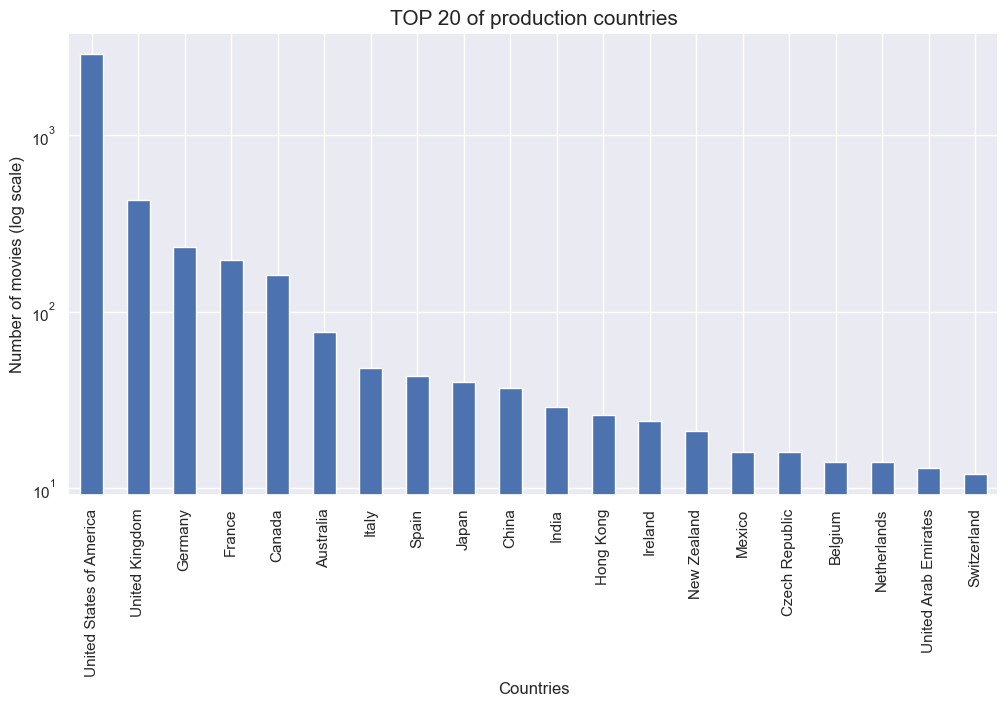

In [171]:
df_prod_countries_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of production countries',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Countries")
plt.yscale("log")
plt.show()

In [172]:
#we only keep the 10 top countries with the most movies, 
interesting_prod_countries = df_prod_countries_count.head(10).index.values
movie_df.production_countries = movie_df.production_countries.apply(lambda x :[prod for prod in x if prod in interesting_prod_countries])

### Spoken languages

In [173]:
df_lang_count = movie_df.explode('spoken_languages')['spoken_languages'].value_counts()
df_lang_count.head(10)

spoken_languages
English      3115
Français      303
Español       270
Deutsch       178
Pусский       147
Italiano      142
日本語            82
普通话            79
العربية        55
Português      46
Name: count, dtype: int64

C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shromana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.prin

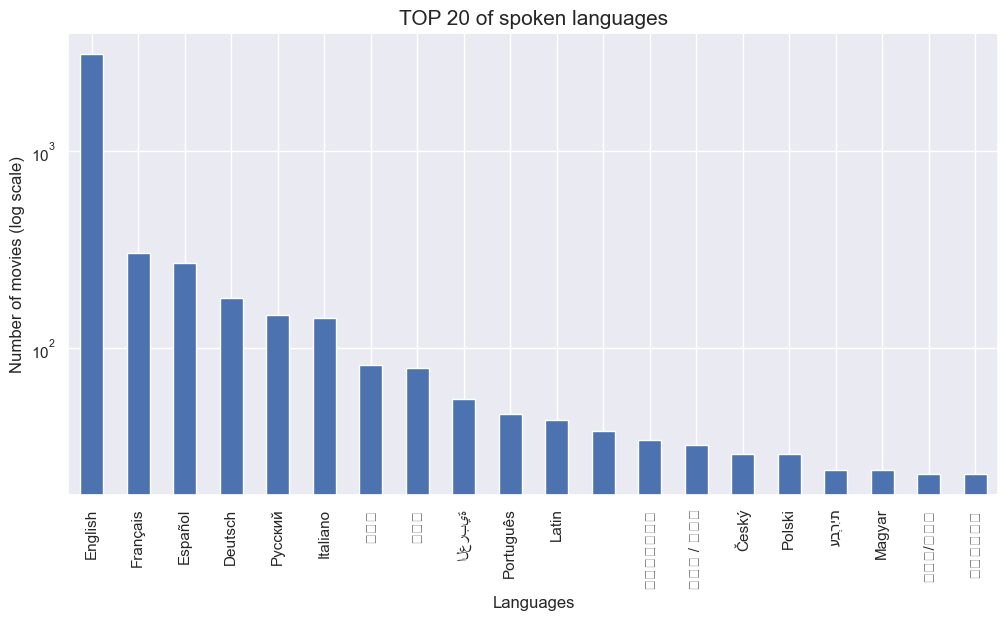

In [174]:
df_lang_count[:20].plot(kind ="bar",figsize=(12,6),legend = False)
plt.title('TOP 20 of spoken languages',fontsize=15)
plt.ylabel("Number of movies (log scale)")
plt.xlabel("Languages")
plt.yscale("log")
plt.show()

In [175]:
interesting_lang = df_lang_count.head(5).index.values
movie_df.spoken_languages = movie_df.spoken_languages.apply(lambda x :[lang for lang in x if lang in interesting_lang])

### original_language

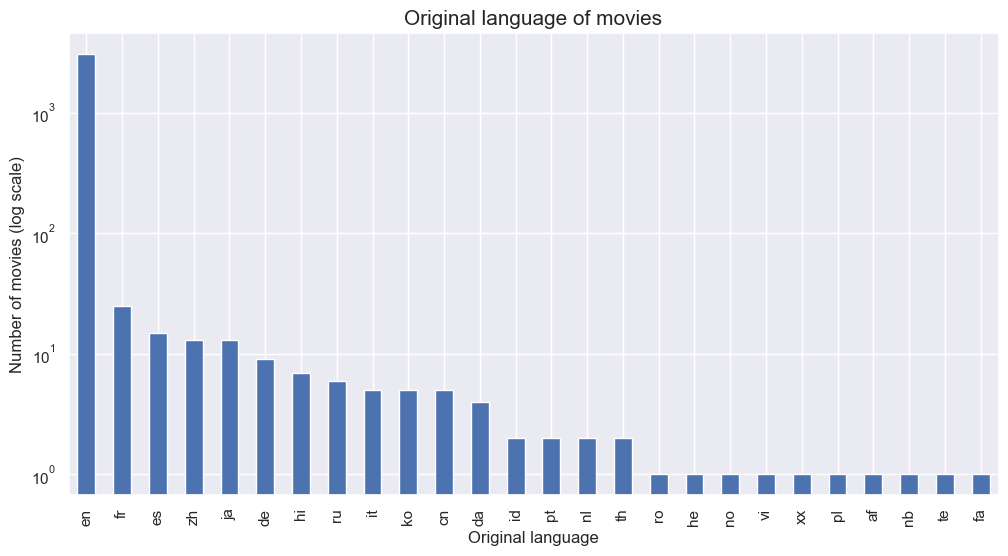

In [176]:
fig , ax =plt.subplots(figsize=(12,6))
movie_df.original_language.value_counts().plot(kind='bar')

plt.yscale("log")
plt.title("Original language of movies",fontsize=15)
plt.xlabel("Original language")
plt.ylabel("Number of movies (log scale)")
plt.show()

* Not keeping it as feature.

### status

In [177]:
movie_df.status.value_counts()

status
Released    3208
Name: count, dtype: int64

* Not a Relevant feature.

In [178]:
movie_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit', 'year', 'day_of_year', 'month', 'date', 'day',
       'budget_adjusted', 'revenue_adjusted'],
      dtype='object')

In [179]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

# Movies dataframe

In [180]:
movies.shape

(4809, 23)

## Selecting Relevant Columns

In [181]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [182]:
movies.shape

(4809, 7)

### Null Values

In [183]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [184]:
movies.dropna(inplace=True)

In [185]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [186]:
movies.duplicated().sum()

0

### Checking Genres

In [187]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [188]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [189]:
movies['genres'] = movies['genres'].apply(convert)

## Checking Keywords

In [190]:
movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [191]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Cast

In [192]:
# handle cast
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

### Keeping 3 casts

In [193]:
def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [194]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Crew

In [195]:
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

## Fetch Director Name


In [196]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [197]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [198]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


## Overview

In [199]:
movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [200]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(4)

,movie_id,title,overview,genres,keywords,cast,crew
3051,10029,Very Bad Things,"[Kyle, Fisher, has, one, last, night, to, cele...","[Comedy, Crime, Thriller]","[prostitute, hotel, cocaine, nudity, psychopat...","[Jon Favreau, Leland Orser, Cameron Diaz]",[Peter Berg]
566,920,Cars,"[Lightning, McQueen,, a, hotshot, rookie, race...","[Animation, Adventure, Comedy, Family]","[car race, car journey, village and town, auto...","[Owen Wilson, Paul Newman, Bonnie Hunt]",[John Lasseter]
3414,13919,The Chumscrubber,"[The, Chumscrubber, is, a, dark, comedy, about...","[Comedy, Drama]","[suicide, father son relationship, surreal, in...","[Jamie Bell, Camilla Belle, Justin Chatwin]",[Arie Posin]
4744,473,Pi,"[The, debut, film, from, Darren, Aronofsky, in...","[Mystery, Drama, Thriller]","[hacker, mathematician, helix, headache, chaos...","[Sean Gullette, Mark Margolis, Ben Shenkman]",[Darren Aronofsky]


In [201]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

### Removing Space

In [202]:
def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [203]:
movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

## Concatenate all into tag

In [204]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [205]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [206]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

## droping those extra column

In [207]:
new_df = movies[['movie_id','title','tags']]

In [208]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [209]:
# Converting list to str
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

C:\Users\shromana\AppData\Local\Temp\ipykernel_10228\3674298559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [210]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [211]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\shromana\AppData\Local\Temp\ipykernel_10228\3444714728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [212]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."


## Natural Language Processing

### Stemming

In [213]:
ps = PorterStemmer()

In [214]:
def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [215]:
new_df['tags'] = new_df['tags'].apply(stems)

C:\Users\shromana\AppData\Local\Temp\ipykernel_10228\3973021881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stems)


In [216]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

## CountVectorizer

In [217]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [218]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [219]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [220]:
vector.shape

(4806, 5000)

In [221]:
similarity = cosine_similarity(vector)

In [222]:
similarity.shape

(4806, 4806)

## Checking Similarity

In [223]:
new_df[new_df['title'] == 'The Lego Movie'].index[0]

744

In [224]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [225]:
recommend('Spider-Man')

Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2
Arachnophobia
Kick-Ass


## Save model

In [226]:
pickle.dump(new_df,open('artifacts/movie_list.pkl','wb'))
pickle.dump(similarity,open('artifacts/similarity.pkl','wb'))